# Ingeniería de features, Modelos avanzados e Interpretación de modelos

###### El aprendizaje automático (AA) encuentra patrones complejos y que pueden ser útiles en los datos de forma automática. Estos patrones se reducen a un modelo de AA que luego puede usarse sobre datos nuevos; este proceso se llama realizar predicciones o realizar inferencias.
###### La creación de un modelo de AA consta de un proceso de varios pasos. Cada paso presenta sus propios desafíos técnicos y conceptuales. Nos enfocamos en el proceso de selección, transformación y aumento de los datos de origen (en tareas de aprendizaje supervisadas) para crear señales predictivas y potentes hacia la variable objetivo (respuesta). En estas operaciones, se combinan el conocimiento del campo y las técnicas de la ciencia de datos. Esa es la esencia de la ingeniería de atributos. 
###### Además, cuando se usa un modelo de AA para realizar predicciones, se debe aplicar las mismas transformaciones que se usan en los datos de entrenamiento a los nuevos datos, de manera que los conjuntos de datos en vivo se presenten al modelo de AA como el modelo lo espera.
###### El preprocesamiento de datos para el AA requiere de la ingeniería de datos y de la ingeniería de atributos. La ingeniería de datos es el proceso de convertir datos sin procesar en datos preparados. La ingeniería de atributos realiza ajustes sobre los datos preparados para crear los atributos que requiere el modelo del AA

##### Consigna: En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  
#import warnings 
#warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')


##### Utilizamos el siguiente dataset (es el mismo que en el Proyecto 01): Dataset Properati 

In [2]:
propiedades=pd.read_csv('DS_proyecto_01_Datos_properati.csv')
propiedades.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### Buscando si hay variables duplicadas
######   Puede suceder que en alguna ocasión encontremos registros duplicados en nuestro conjunto de datos. Es importante detectar estos registros y eliminar todos aquellos que se repitan más de una vez. No hacer esto podría suponer que el elemento duplicado sea tenido más en cuenta que el resto de los datos por parte del método de aprendizaje automático y, por lo tanto, éste se entrene de manera sesgada.

In [3]:
duplicates = propiedades[propiedades.duplicated()]
duplicates.shape

(2358, 19)

#### Eliminacion de las variables duplicadas

In [4]:
propiedades=propiedades.drop_duplicates()
propiedades.shape

(144302, 19)

### Para este segundo proyecto mantendremos la propiedades publicadas en Capital Federal, y los tipos de propiedades estudiados: Departamento, PH, Casa.

In [5]:
propied=propiedades[(propiedades.l2 == 'Capital Federal') &
                    (propiedades.property_type.isin(['Departamento','PH','Casa']))]
propied.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


### El total de publicaciones  para Capital Federal es de 92539, siendo el 98,86% correspondientes a Departamentos, Casas y PH 

In [6]:
propied = propied.loc [:, ['l3','rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered', 'price','property_type']]

propied.shape

(89874, 8)

In [7]:
propied.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


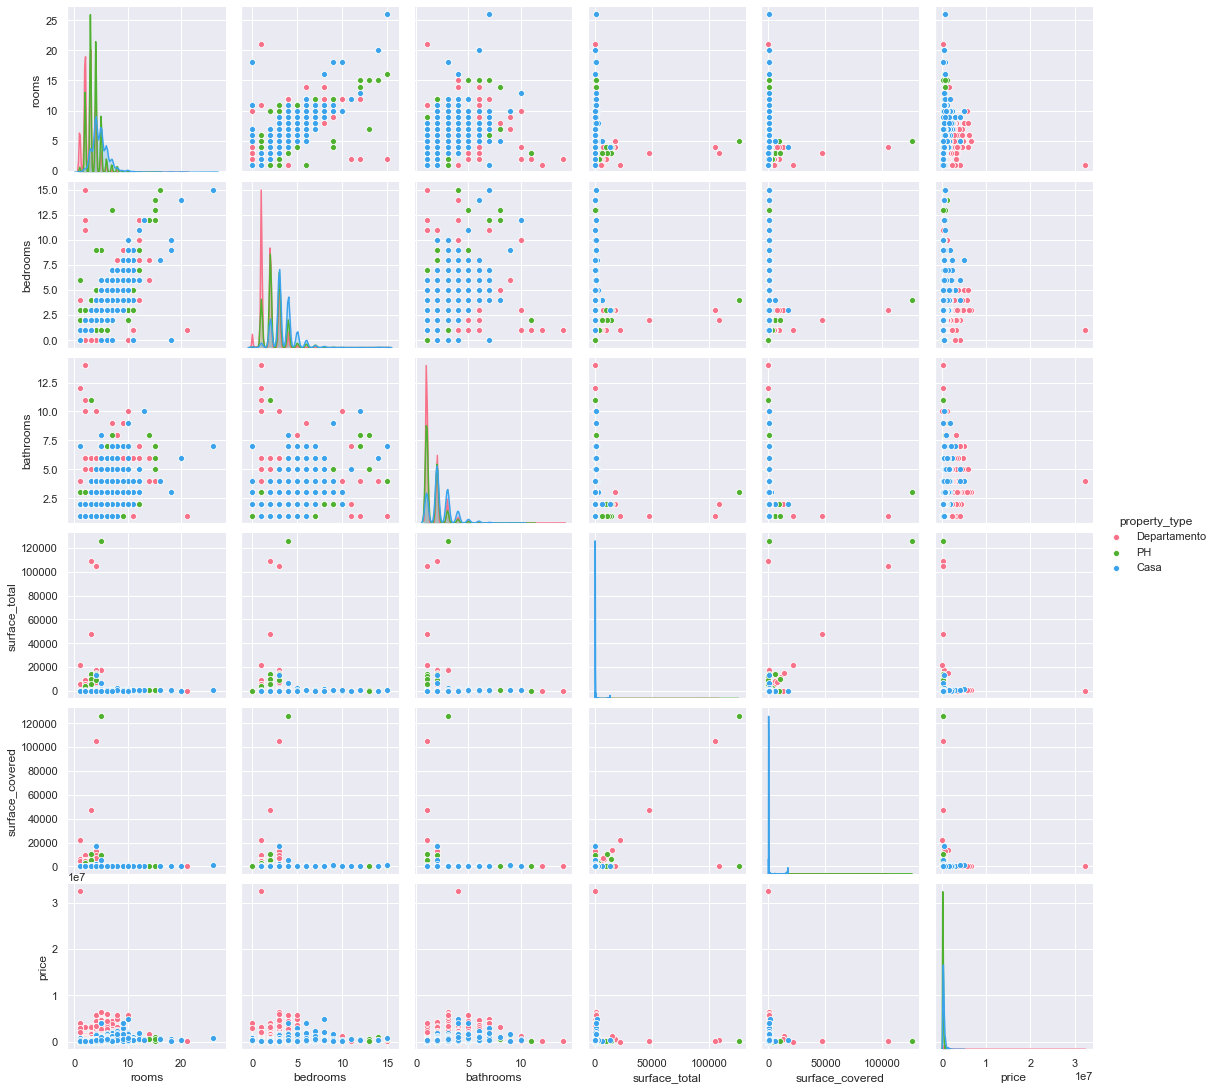

In [8]:
sns.pairplot(propied,hue='property_type',palette="husl")

## Parte A- Transformacion de Datos

### Se realiza la transformacion de datos sin tener en cuenta los tipos de propiedades

In [9]:
propied_1=propied.copy()
propied_1.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


#### Deteccion y eliminacion de outliers
###### Debido a errores de almacenamiento, de medición o de inserción de los datos, pueden aparecer outliers (datos anómalos) en alguno de nuestros campos. Estos valores pueden distorsionar mucho la distribución de los datos haciendo que todo el proceso de aprendizaje se vea afectado. Existen muchas técnicas destinadas a intentar detectar estos datos anómalos.

In [10]:
def boxplot_comparacion (df):
    """" Realiza boxplot comparativos segun las distintas variables de todas las propiedades y por tipos de propiedad"""
    my_pal = {"Departamento": "red", "Casa": "blue", "PH":"orange"}
    
    plt.figure (figsize = (11,22))
    gs = gridspec.GridSpec (6, 2)
    ax1 = plt.subplot (gs [0])
    sns.boxplot(data =df, x = 'surface_total',color='magenta')
    plt.title('Superficie total de las propiedades', color='green',size=15 )
    plt.xticks (rotation = 45) 
    plt.xlabel ('Superficie(m2)', color='r') 
    ax2 = plt.subplot (gs [1]) 
    sns.boxplot(data = df, x ='surface_total' , y= 'property_type',palette=my_pal)                         
    plt.title('Superficie total segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Superficie total (m2)' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xticks (rotation = 45) 
    ax3 = plt.subplot (gs [1,0])
    sns.boxplot(data = df, x = 'surface_covered',color='magenta')
    plt.title('Superficie cubierta de las propiedades', color='green',size=15 )
    plt.xticks (rotation = 45) 
    plt.xlabel ('Superficie(m2)', color='r') 
    ax4 = plt.subplot (gs [1,1]) 
    sns.boxplot(data = df, x ='surface_covered' , y = 'property_type',palette=my_pal)                         
    plt.title('Superficie cubierta segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Superficie cubierta (m2)' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xticks (rotation = 45) 
    ax5 = plt.subplot (gs [2,0])
    sns.boxplot(data =df, x = 'rooms',color='magenta')
    plt.title('Numero de Ambientes de las propiedades', color='green',size=15 )
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45) 
    plt.xlabel ('Numero Ambientes', color='r') 
    ax6 = plt.subplot (gs [2,1]) 
    sns.boxplot(data = df,x ='rooms' , y= 'property_type',palette=my_pal)                         
    plt.title('Numerode Ambientes segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Numero Ambientes' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45)
    ax7 = plt.subplot (gs [3,0])
    sns.boxplot(data = df, x = 'bedrooms',color='magenta')
    plt.title('Numero de Dormitorios de las propiedades', color='green',size=15 )
    plt.xticks (rotation = 45) 
    plt.xlabel ('Numero Dormitorios', color='r') 
    ax8 = plt.subplot (gs [3,1]) 
    sns.boxplot(data = df, x ='bedrooms' ,y = 'property_type',palette=my_pal)                         
    plt.title('Numero de Dormitorios segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Numero Dormitorios' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xticks (rotation = 45)
    ax9 = plt.subplot (gs [4,0])
    sns.boxplot(data =df, x = 'bathrooms',color='magenta')
    plt.title('Numero de Baños de las propiedades', color='green',size=15 )
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45) 
    plt.xlabel ('Numero de Baños', color='r') 
    ax10 = plt.subplot (gs [4,1]) 
    sns.boxplot(data = df, x ='bathrooms' , y = 'property_type',palette=my_pal)                         
    plt.title('Numero de Baños segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Numero de Baños' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45)
    ax11 = plt.subplot (gs [5,0])
    sns.boxplot(data = df, x = 'price',color='magenta')
    plt.title('Precio de las propiedades ', color='green',size=15 )
    plt.xticks (rotation = 45) 
    plt.xlabel ('Precio(USD)', color='r') 
    ax12 = plt.subplot (gs [5,1]) 
    sns.boxplot(data = df, x ='price' , y = 'property_type',palette=my_pal)                         
    plt.title('Precio segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Precio(USD)' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45)
    plt.tight_layout()

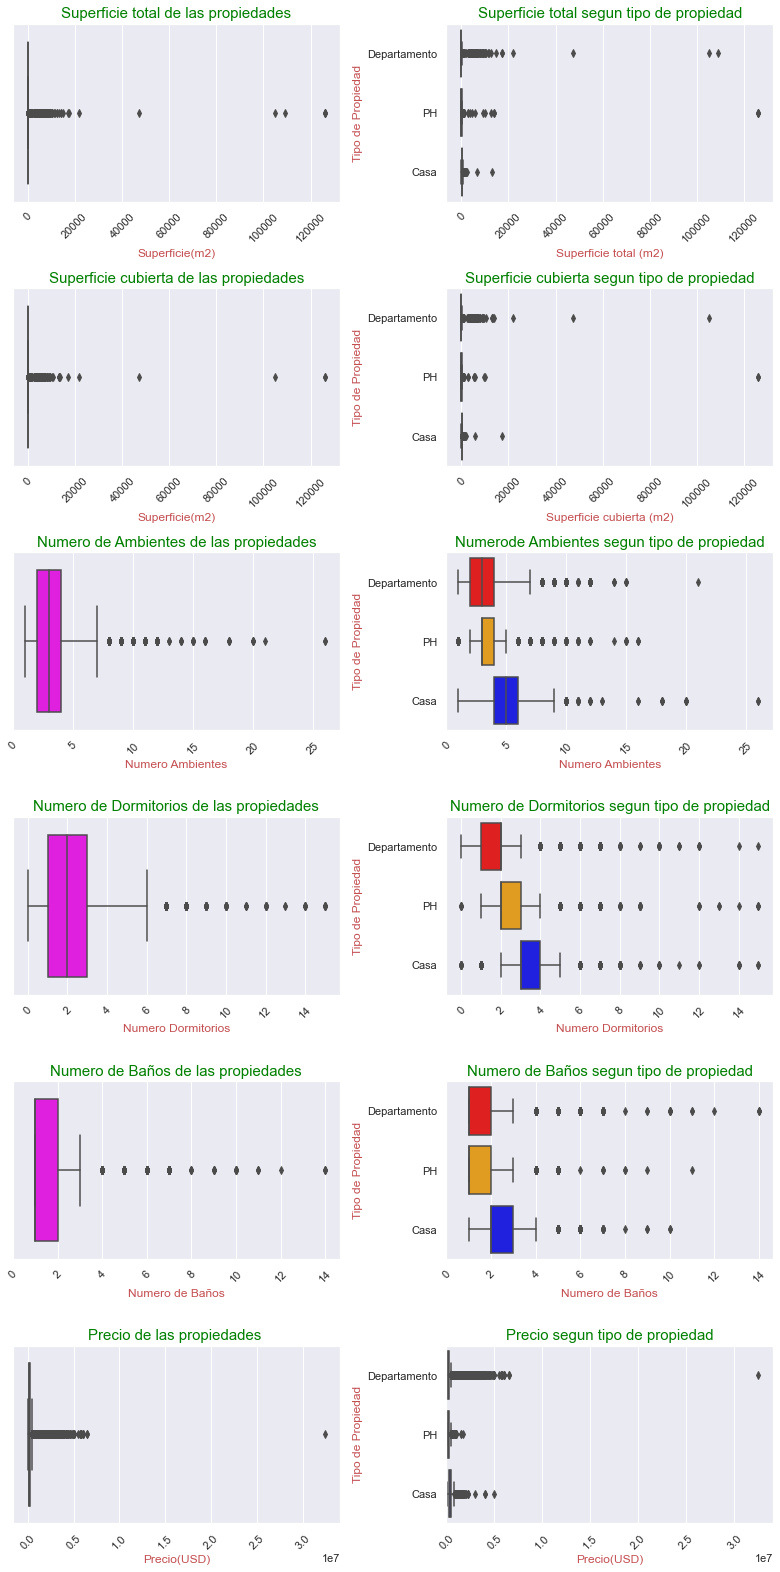

In [11]:
boxplot_comparacion(propied_1) 
# ver de colocar histogramas

In [12]:
propied_1.describe(include='all')

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
count,89874,89874.000000,89874.000000,87727.000000,81157.000000,80850.000000,8.987400e+04,89874
unique,57,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Palermo,NaN,NaN,NaN,NaN,NaN,NaN,Departamento
freq,12736,NaN,NaN,NaN,NaN,NaN,NaN,77629
mean,NaN,2.965129,1.960456,1.558562,112.885494,95.169746,2.587195e+05,NaN
std,NaN,1.317503,1.074358,0.858386,989.133753,785.177443,3.190762e+05,NaN
min,NaN,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03,NaN
25%,NaN,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05,NaN
50%,NaN,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05,NaN
75%,NaN,4.000000,3.000000,2.000000,111.000000,96.000000,2.782000e+05,NaN


In [13]:
#definimos una funcion para eliminar los outliers
def remove_outlier(data,column):
    """Elimina valores atípicos de un marco de datos por columna,eliminando filas para las cuales el valor de la columna 
    es menor que Q1-1.5IQR o mayor que Q3 + 1.5IQR.
   Argumentos
       data (`: obj: pd.DataFrame`): un marco de datos de pandas para subconjunto, 
        column (str): nombre de la columna para calcular el subconjunto.
    Return
        (`: obj: pd.DataFrame`): data filtrado"""
    
    q1,q3= np.nanpercentile(data[column],[25,75])
    iqr= q3-q1 #rango intercuartilico
    l_i= q1-1.5*iqr
    l_s=q3+1.5*iqr
    data_out = data [~((data[column]< l_i) |(data[column]> l_s))]
    return data_out

In [14]:
pr_1=propied_1.copy()
pr_1=remove_outlier(pr_1,'surface_covered')
pr_1=remove_outlier(pr_1,'surface_total')
pr_1=remove_outlier(pr_1,'price')
pr_1=remove_outlier(pr_1,'bathrooms')
pr_1=remove_outlier(pr_1,'rooms')
pr_1=remove_outlier(pr_1,'bedrooms')
pr_1.shape

(73340, 8)

In [15]:
#VEr tema Outliers

In [16]:
pr_1.isnull().sum(axis=0)*100/len(pr_1)

l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.566130
surface_total      10.512681
surface_covered    10.867194
price               0.000000
property_type       0.000000
dtype: float64

#### Deteccion e Imputacion de datos faltantes
###### Es muy común que, si estamos trabajando con un conjunto de datos, algunos valores estén vacíos. Esto puede ocurrir por infinidad de motivos (ausencia de medición real, error al almacenar la información, error al recuperarla, etc.) El principal problema de estas ausencias es que impiden que el sistema de aprendizaje automático pueda entrenarse correctamente ya que la ausencia de datos no es numéricamente tratable.  Para solucionar este problema existen varias aproximaciones que pueden ser utilizadas dependiendo de los datos que estemos tratand

Número de columnas con datos faltantes:3
Recuento de valores nulos por columna: 
- A la columna 'bathrooms': le falta 1882 datos.
- A la columna 'surface_total': le falta 7710 datos.
- A la columna 'surface_covered': le falta 7970 datos.


<AxesSubplot:>

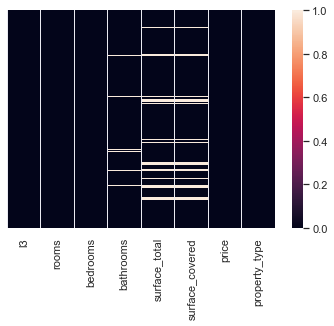

In [17]:
#Cantidad de valores faltantes por columna
miss_values_count= pr_1.isnull().sum(min_count=1)
miss_values_count=miss_values_count[miss_values_count !=0]

print(f"Número de columnas con datos faltantes:{miss_values_count.shape[0]}")
if miss_values_count.shape[0]:
        print("Recuento de valores nulos por columna: ")
        for name, miss_vals in miss_values_count.items():
            p= miss_vals > 1
            print(f"- A la columna '{name}': le falta {''if p else ''}" 
                  f"{miss_vals} dato{ 's' if p else ''}.")
sns.heatmap(pr_1.isna(), yticklabels=False) #grafica de valores faltantes por columna

In [18]:
pr_1_s_nan=pr_1.copy()
pr_1_s_nan=pr_1_s_nan.dropna(axis=0)
pr_1_s_nan.shape

(64530, 8)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=pr_1_s_nan.loc[:,['rooms', 'bedrooms','bathrooms', 'surface_total']]
y=pr_1_s_nan.loc[:,['surface_covered']]
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.20, random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
knn= KNeighborsRegressor()

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# Grilla para Grid Search
param_grid = {'n_neighbors':np.arange(1, 20)} 

In [25]:
model = GridSearchCV(knn, param_grid=param_grid, cv=5)
# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)
model.best_estimator_
print('n_neighbors =',model.best_estimator_.n_neighbors)
print('mejores parametros:'+str (model.best_params_))
print('Mejor Score:'+str (model.best_score_)+'\n')

n_neighbors = 15
mejores parametros:{'n_neighbors': 15}
Mejor Score:0.886367106442712



In [26]:
from sklearn.impute import KNNImputer

In [27]:
# KNNImputer
pr_1_i_k= pr_1.copy()
imp_knn= KNNImputer(n_neighbors=15)
columns=['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered']
pr_1_i_k[columns]= imp_knn.fit_transform(pr_1_i_k[columns])
pr_1_i_k.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH


In [28]:
pr_1_i_k.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [29]:
pr_1_i_k['bathrooms']=round(pr_1_i_k['bathrooms'],0)

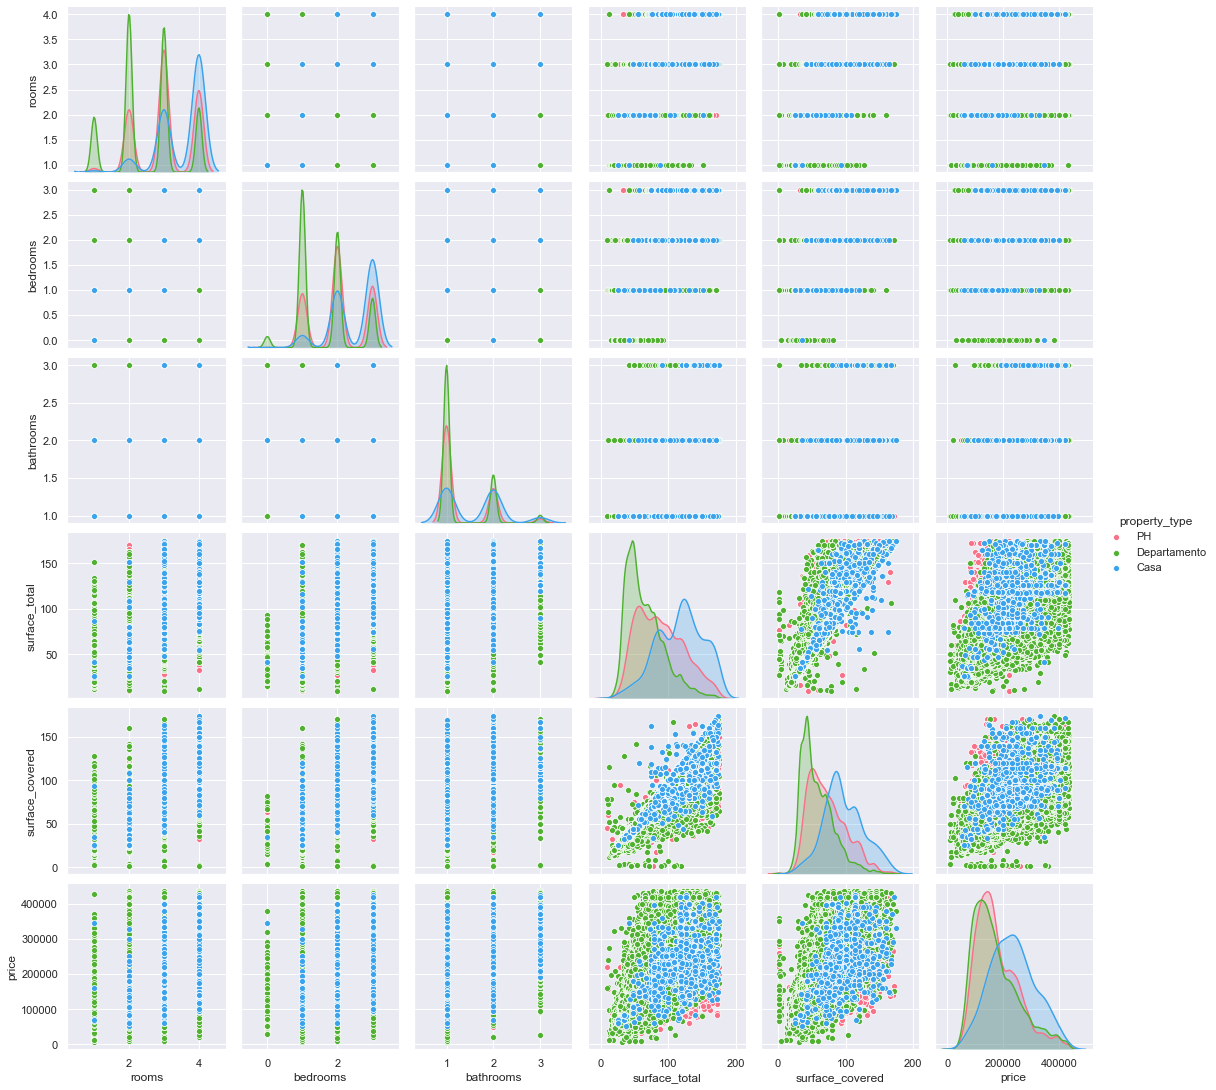

In [30]:
sns.pairplot(pr_1_i_k,hue='property_type',palette="husl")

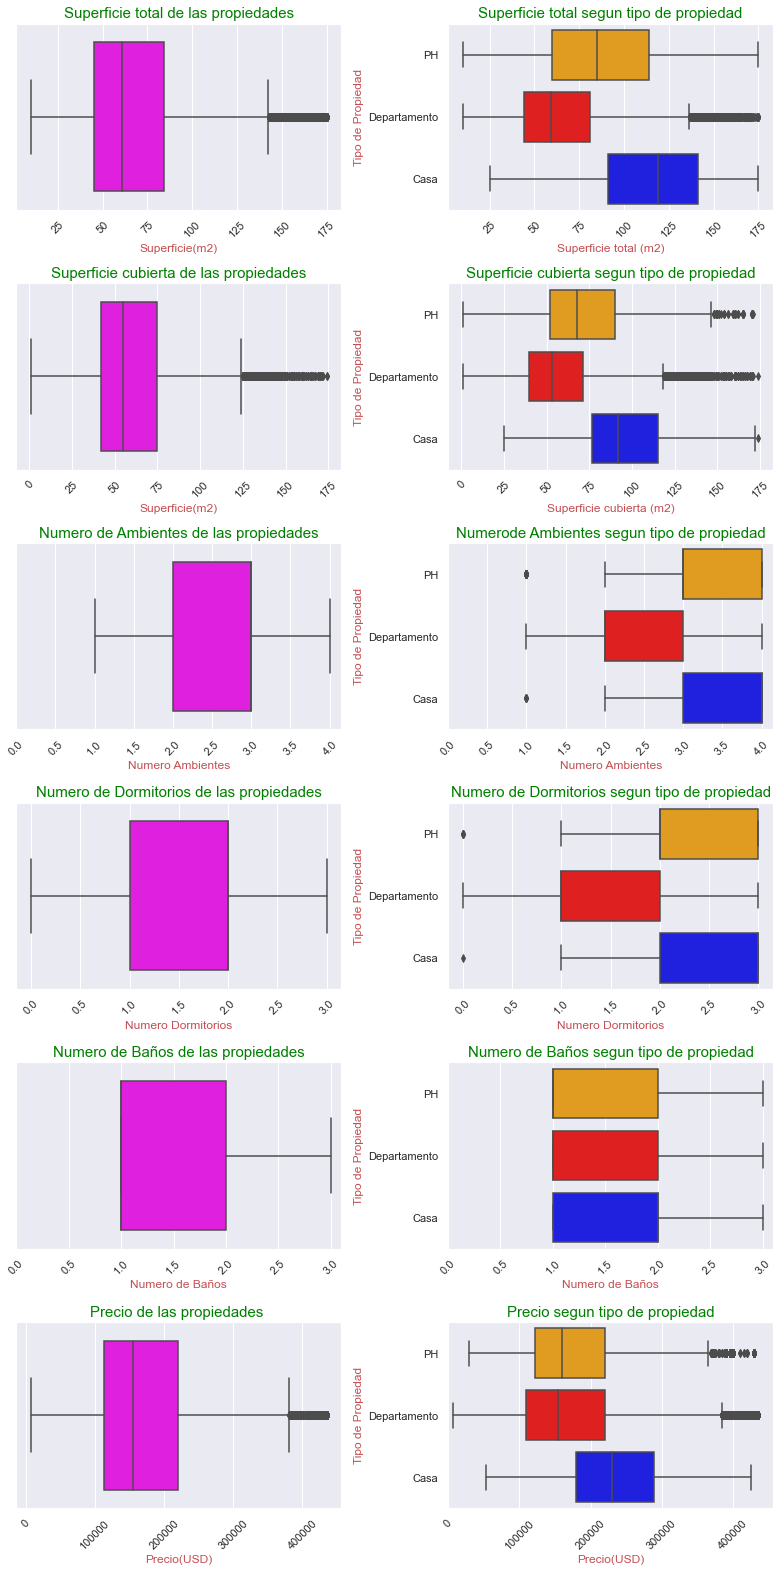

In [31]:
boxplot_comparacion(pr_1_i_k) 

#### Estudiando las correlaciones 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.937716,0.479491,0.747613,0.789920,0.586182
bedrooms,0.937716,1.000000,0.486110,0.736376,0.782610,0.572764
bathrooms,0.479491,0.486110,1.000000,0.571290,0.596989,0.587270
surface_total,0.747613,0.736376,0.571290,1.000000,0.915429,0.730171
surface_covered,0.789920,0.782610,0.596989,0.915429,1.000000,0.740053
price,0.586182,0.572764,0.587270,0.730171,0.740053,1.000000


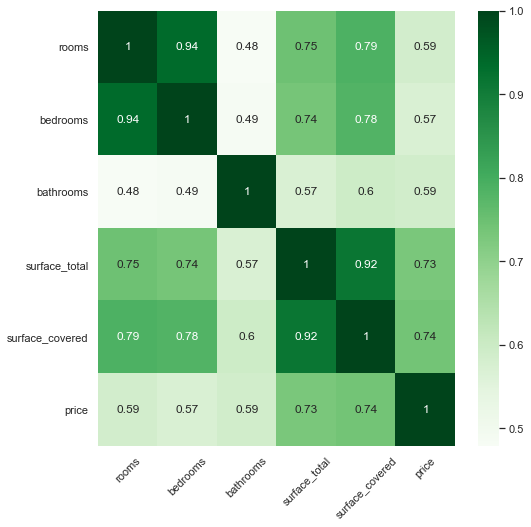

In [32]:
plt.figure (figsize = (8,8)) 
c = pr_1_i_k.corr () 
sns.heatmap (c, cmap = 'Greens', annot = True) 
plt.xticks (rotation = 45) 
plt.yticks(rotation=0)
c

#### Datos erroneos: Inconsistencia de datos
###### Inconsistencia de datos: Ocurre en muchas ocasiones que cuando estamos procesando datos detectamos errores en el formato o en el tipo de alguno de ellos. Esto puede ser debido a un error de lectura de los datos o a un mal almacenamiento de estos. Por ejemplo:  fechas que siempre comienzan por el día del mes y en ciertos registros empiezan por el año, valores que deberían ser numéricos que incluyen otro tipo de caracteres, etc. Existen multitud de validaciones que es necesario comprobar y tratar de solucionar para que los datos sean coherentes. En este punto, dependiendo de la variable que estemos analizando, se deberán aplicar unas técnicas de validación u otras, que en ocasiones puede llegar a requerir conocimiento experto del problema.
##### Superficie total no puede ser menor que la  superficie cubierta
##### Estudiando si hay valores de superficie cubierta mayor a los de superficie total

In [33]:
sup_e_rows = pr_1_i_k[pr_1_i_k.surface_total < pr_1_i_k.surface_covered]
print('Hay %s instancias con errores en la superficie.'%(sup_e_rows.shape[0]))
print('Porcentaje de instancias con valor de superficie total menor a superficie  cubierta: ','{0:.0%}'
      .format(sup_e_rows.shape[0]/pr_1_i_k.shape[0]))

Hay 614 instancias con errores en la superficie.
Porcentaje de instancias con valor de superficie total menor a superficie  cubierta:  1%


###### Proponemos eliminar estas instancias con errores en la superficie total, dado que representan un minimo porcentaje del total de instancias  (1%)

In [34]:
pr_1_i_k.drop( pr_1_i_k[pr_1_i_k.surface_total <  pr_1_i_k.surface_covered].index, inplace = True)
pr_1_i_k.shape

(72726, 8)

In [35]:
sup_e_rows = pr_1_i_k[pr_1_i_k.surface_total < pr_1_i_k.surface_covered]
print('Hay %s instancias con errores en la superficie.'%(sup_e_rows.shape[0]))

Hay 0 instancias con errores en la superficie.


#### Encoding

In [36]:
pr_1_c_e=pr_1_i_k.copy()

In [37]:
miss_values_count=pr_1_c_e['property_type'].unique()
print(f"Toltal de tipos de propiedades publicadas :\n{miss_values_count.shape[0]}")
print(f"Los tipos de propiedades publicadas son :\n {pr_1_c_e['property_type'].unique()}")

Toltal de tipos de propiedades publicadas :
3
Los tipos de propiedades publicadas son :
 ['PH' 'Departamento' 'Casa']


In [38]:
pr_1_c_e= pd.get_dummies(pr_1_c_e, columns=["l3","property_type"], prefix=["Barrio:","Propiedad:"])

In [39]:
pr_1_c_e.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Barrio:_Abasto,Barrio:_Agronomía,Barrio:_Almagro,Barrio:_Balvanera,...,Barrio:_Villa Pueyrredón,Barrio:_Villa Real,Barrio:_Villa Riachuelo,Barrio:_Villa Santa Rita,Barrio:_Villa Soldati,Barrio:_Villa Urquiza,Barrio:_Villa del Parque,Propiedad:_Casa,Propiedad:_Departamento,Propiedad:_PH
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Se realiza la transformacion de datos teniendo en cuenta el tipo de propiedad

In [40]:

propie_1= propied.copy()

#### Tipo de propiedad analisada Departamentos
##### Corresponden al 85,4% de las  propiedades publicadas para la venta en Capital Federal
###### el 24,15% de sus datos son datos nulos (19088)
###### el 11,83% de los falores faltantes son de superficie cubierta, el 11,47% de superficie total y el 2,71% de baños
###### Alta cardinalidad: hay publicaciones de 57 barrios, la distribucion de las publicaciones es diferente a las demas propiedades
###### dormitorios está altamente correlacionado con ambientes
###### dormitorios tiene 2200 (2.8%) ceros (que corresponde a departamentos de 1 ambiente)

In [41]:
p_d=propie_1[propie_1.property_type.isin(['Departamento'])]
p_d.shape

(77629, 8)

##### Eliminacion de Outliers de Departamento

In [42]:
p_d=remove_outlier(p_d,'surface_covered')
p_d=remove_outlier(p_d,'surface_total')
p_d=remove_outlier(p_d,'price')
p_d=remove_outlier(p_d,'bathrooms')
p_d=remove_outlier(p_d,'rooms')
p_d=remove_outlier(p_d,'bedrooms')
p_d.shape

(64847, 8)

##### Imputacion de datos faltantes en Departamentos

Número de columnas con datos faltantes:3
Recuento de valores nulos por columna: 
- A la columna 'bathrooms': le falta 1762 datos.
- A la columna 'surface_total': le falta 7441 datos.
- A la columna 'surface_covered': le falta 7673 datos.


<AxesSubplot:>

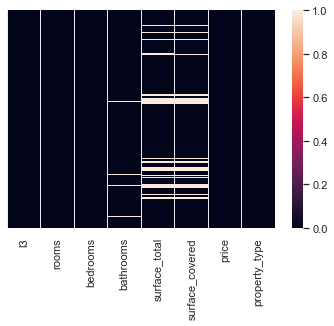

In [43]:
#Cantidad de valores faltantes por columna
miss_values_count= p_d.isnull().sum(min_count=1)
miss_values_count=miss_values_count[miss_values_count !=0]

print(f"Número de columnas con datos faltantes:{miss_values_count.shape[0]}")
if miss_values_count.shape[0]:
        print("Recuento de valores nulos por columna: ")
        for name, miss_vals in miss_values_count.items():
            p= miss_vals > 1
            print(f"- A la columna '{name}': le falta {''if p else ''}" 
                  f"{miss_vals} dato{ 's' if p else ''}.")
sns.heatmap(p_d.isna(), yticklabels=False) #grafica de valores faltantes por columna

In [44]:
p_d.isnull().sum(axis=0)*100/len(p_d)

l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.717165
surface_total      11.474702
surface_covered    11.832467
price               0.000000
property_type       0.000000
dtype: float64

In [45]:
p_d_s_nan=p_d.copy()
p_d_s_nan=p_d_s_nan.dropna(axis=0)
X=p_d_s_nan.loc[:,['rooms', 'bedrooms','bathrooms', 'surface_total']]
y=p_d_s_nan.loc[:,['surface_covered']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
knn= KNeighborsRegressor()

In [47]:
# Grilla para Grid Search
param_grid = {'n_neighbors':np.arange(1, 20)}
model = GridSearchCV(knn, param_grid=param_grid, cv=5)
# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)
model.best_estimator_
print('n_neighbors =',model.best_estimator_.n_neighbors)
print('mejores parametros:'+str (model.best_params_))
print('Mejor Score:'+str (model.best_score_)+'\n')

n_neighbors = 16
mejores parametros:{'n_neighbors': 16}
Mejor Score:0.9108452467431363



In [48]:
p_d_i_k= p_d.copy()

In [49]:
# KNNImputer
p_d_i_k= p_d.copy()
imp_knn= KNNImputer(n_neighbors=16)
columns=['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered']
p_d_i_k[columns]= imp_knn.fit_transform(p_d_i_k[columns])
p_d_i_k.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
22,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Departamento


In [50]:
p_d_i_k.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [51]:
p_d_i_k['bathrooms']=round(p_d_i_k['bathrooms'],0)
p_d_1=p_d_i_k.copy()

#### Tipo de propiedad analisada: Casa
##### Corresponden al 2,9% de las  propiedades publicadas para la venta en Capital Federal
###### el 38.33% de sus datos son datos nulos (1032)
###### el 16,82% de los falores faltantes son de superficie cubierta, el 16.63% de superficie total y el 5.65% de baños
###### Alta cardinalidad: hay publicaciones de 53 barrios. la distribucion de las publicaciones es diferente a las demas propiedades

In [52]:
p_c=propie_1[propie_1.property_type.isin(['Casa'])]
p_c.shape

(2671, 8)

##### Eliminacion de Outliers de Casa

In [53]:
p_c=remove_outlier(p_c,'surface_covered')
p_c=remove_outlier(p_c,'surface_total')
p_c=remove_outlier(p_c,'price')
p_c=remove_outlier(p_c,'bathrooms')
p_c=remove_outlier(p_c,'rooms')
p_c=remove_outlier(p_c,'bedrooms')
p_c.shape

(2068, 8)

##### Imputacion de datos faltantes en Casas

In [54]:
p_c.isnull().sum(axis=0)*100/len(p_c)

l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           5.657640
surface_total      16.634429
surface_covered    16.827853
price               0.000000
property_type       0.000000
dtype: float64

Número de columnas con datos faltantes:3
Recuento de valores nulos por columna: 
- A la columna 'bathrooms': le falta 117 datos.
- A la columna 'surface_total': le falta 344 datos.
- A la columna 'surface_covered': le falta 348 datos.


<AxesSubplot:>

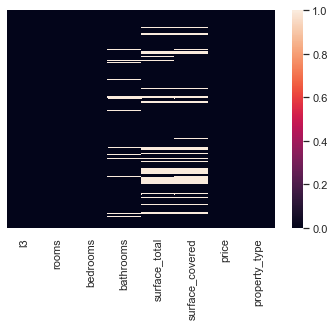

In [55]:
#Cantidad de valores faltantes por columna
miss_values_count= p_c.isnull().sum(min_count=1)
miss_values_count=miss_values_count[miss_values_count !=0]

print(f"Número de columnas con datos faltantes:{miss_values_count.shape[0]}")
if miss_values_count.shape[0]:
        print("Recuento de valores nulos por columna: ")
        for name, miss_vals in miss_values_count.items():
            p= miss_vals > 1
            print(f"- A la columna '{name}': le falta {''if p else ''}" 
                  f"{miss_vals} dato{ 's' if p else ''}.")
sns.heatmap(p_c.isna(), yticklabels=False) #grafica de valores faltantes por columna

In [56]:
p_c_s_nan= p_c.copy()
p_c_s_nan=p_c_s_nan.dropna(axis=0)
X=p_c_s_nan.loc[:,['rooms', 'bedrooms','bathrooms', 'surface_total']]
y=p_c_s_nan.loc[:,['surface_covered']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [57]:
# Grilla para Grid Search
param_grid = {'n_neighbors':np.arange(1, 20)}
model = GridSearchCV(knn, param_grid=param_grid, cv=5)
# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)
model.best_estimator_
print('n_neighbors =',model.best_estimator_.n_neighbors)
print('mejores parametros:'+str (model.best_params_))
print('Mejor Score:'+str (model.best_score_)+'\n')

n_neighbors = 7
mejores parametros:{'n_neighbors': 7}
Mejor Score:0.6298867090182725



In [58]:
# KNNImputer
p_c_i_k= p_c.copy()
imp_knn= KNNImputer(n_neighbors=7)
columns=['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered']
p_c_i_k[columns]= imp_knn.fit_transform(p_c_i_k[columns])
p_c_i_k.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
384,Mataderos,3.0,2.0,1.0,171.0,120.0,179900.0,Casa
385,Villa Pueyrredón,3.0,2.0,1.0,71.0,68.0,174000.0,Casa
446,Villa Santa Rita,5.0,4.0,3.0,230.0,244.0,490000.0,Casa
454,Parque Avellaneda,6.0,5.0,1.0,210.0,189.0,225000.0,Casa
1075,Villa Devoto,5.0,3.0,2.0,260.0,191.0,450000.0,Casa


In [59]:
p_c_i_k.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [60]:
p_c_i_k['bathrooms']=round(p_c_i_k['bathrooms'],0)
p_c_1= p_c_i_k.copy()

#### Tipo de propiedad analisada: PH
###### Corresponden al 10.55% de las  propiedades publicadas para la venta en Capital Federal
###### el 2,07% de sus datos son datos nulos (203)
###### el 0,81% de los falores faltantes son de superficie cubierta, el 0,43% de superficie total y el 0,81% de baños
###### dormitorios está altamente correlacionado con ambientes
###### Alta cardinalidad: hay publicaciones de 55 barrios; la distribucion de las publicaciones es diferente a las demas propiedades

In [61]:
p_ph=propie_1[propie_1.property_type.isin(['PH'])]
p_ph.shape

(9574, 8)

##### Eliminacion de Outliers de PH

In [62]:
p_ph=remove_outlier(p_ph,'surface_covered')
p_ph=remove_outlier(p_ph,'surface_total')
p_ph=remove_outlier(p_ph,'price')
p_ph=remove_outlier(p_ph,'bathrooms')
p_ph=remove_outlier(p_ph,'rooms')
p_ph=remove_outlier(p_ph,'bedrooms')
p_ph.shape

(8078, 8)

##### Imputacion de datos faltantes en PH

In [63]:
p_ph.isnull().sum(axis=0)*100/len(p_ph)

l3                 0.000000
rooms              0.000000
bedrooms           0.000000
bathrooms          0.817034
surface_total      0.470413
surface_covered    0.817034
price              0.000000
property_type      0.000000
dtype: float64

Número de columnas con datos faltantes:3
Recuento de valores nulos por columna: 
- A la columna 'bathrooms': le falta 66 datos.
- A la columna 'surface_total': le falta 38 datos.
- A la columna 'surface_covered': le falta 66 datos.


<AxesSubplot:>

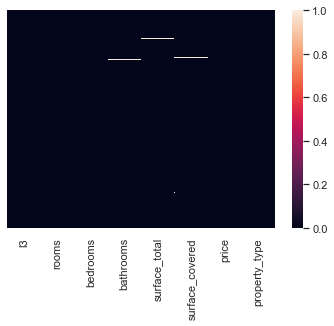

In [64]:
#Cantidad de valores faltantes por columna
miss_values_count= p_ph.isnull().sum(min_count=1)
miss_values_count=miss_values_count[miss_values_count !=0]

print(f"Número de columnas con datos faltantes:{miss_values_count.shape[0]}")
if miss_values_count.shape[0]:
        print("Recuento de valores nulos por columna: ")
        for name, miss_vals in miss_values_count.items():
            p= miss_vals > 1
            print(f"- A la columna '{name}': le falta {''if p else ''}" 
                  f"{miss_vals} dato{ 's' if p else ''}.")
sns.heatmap(p_ph.isna(), yticklabels=False) #grafica de valores faltantes por columna

In [65]:
p_ph_s_nan=p_ph.copy()
p_ph_s_nan=p_ph_s_nan.dropna(axis=0)
X=p_ph_s_nan.loc[:,['rooms', 'bedrooms','bathrooms', 'surface_total']]
y=p_ph_s_nan.loc[:,['surface_covered']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
knn= KNeighborsRegressor()

In [67]:
# Grilla para Grid Search [1,5,10,15,20]
param_grid = {'n_neighbors':np.arange(1, 20)}
model = GridSearchCV(knn, param_grid=param_grid, cv=5)
# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)
model.best_estimator_
print('n_neighbors =',model.best_estimator_.n_neighbors)
print('mejores parametros:'+str (model.best_params_))
print('Mejor Score:'+str (model.best_score_)+'\n')

n_neighbors = 10
mejores parametros:{'n_neighbors': 10}
Mejor Score:0.7933950854050508



In [68]:
# KNNImputer
p_ph_i_k= p_ph.copy()
imp_knn= KNNImputer(n_neighbors=10)
columns=['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered']
p_ph_i_k[columns]= imp_knn.fit_transform(p_ph_i_k[columns])
p_ph_i_k.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH


In [69]:
p_ph_i_k.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [70]:
p_ph_i_k['bathrooms']=round(p_ph_i_k['bathrooms'],0)
p_ph_1=p_ph_i_k.copy()

#### Concatenacion

In [71]:
propie_2 = pd.concat([p_d_1,p_c_1, p_ph_1], axis=0)
propie_2.shape

(74993, 8)

In [72]:
propie_2.isnull().sum(axis=0)*100/len(propie_2)

l3                 0.0
rooms              0.0
bedrooms           0.0
bathrooms          0.0
surface_total      0.0
surface_covered    0.0
price              0.0
property_type      0.0
dtype: float64

#### Datos erroneos
###### Superficie total no puede ser menor que la  superficie cubierta
###### Estudiando si hay valores de superficie cubierta mayor a los de superficie total

In [73]:
sup_e_rows = propie_2[propie_2.surface_total < propie_2.surface_covered]
print('Hay %s instancias con errores en la superficie.'%(sup_e_rows.shape[0]))
print('Porcentaje de instancias con valor de superficie total menor a superficie  cubierta: ','{0:.0%}'
      .format(sup_e_rows.shape[0]/propie_2.shape[0]))

Hay 1494 instancias con errores en la superficie.
Porcentaje de instancias con valor de superficie total menor a superficie  cubierta:  2%


###### Proponemos eliminar estas instancias con errores en la superficie total, dado que representan un minimo porcentaje del total de instancias  (2%)

In [74]:
propie_2.drop( propie_2[propie_2.surface_total <  propie_2.surface_covered].index, inplace = True)
propie_2.shape

(73499, 8)

In [75]:
sup_e_rows = propie_2[propie_2.surface_total < propie_2.surface_covered]
print('Hay %s instancias con errores en la superficie.'%(sup_e_rows.shape[0]))
print('Porcentaje de instancias con valor de superficie total menor a superficie  cubierta: ','{0:.0%}'
      .format(sup_e_rows.shape[0]/propie_2.shape[0]))

Hay 0 instancias con errores en la superficie.
Porcentaje de instancias con valor de superficie total menor a superficie  cubierta:  0%


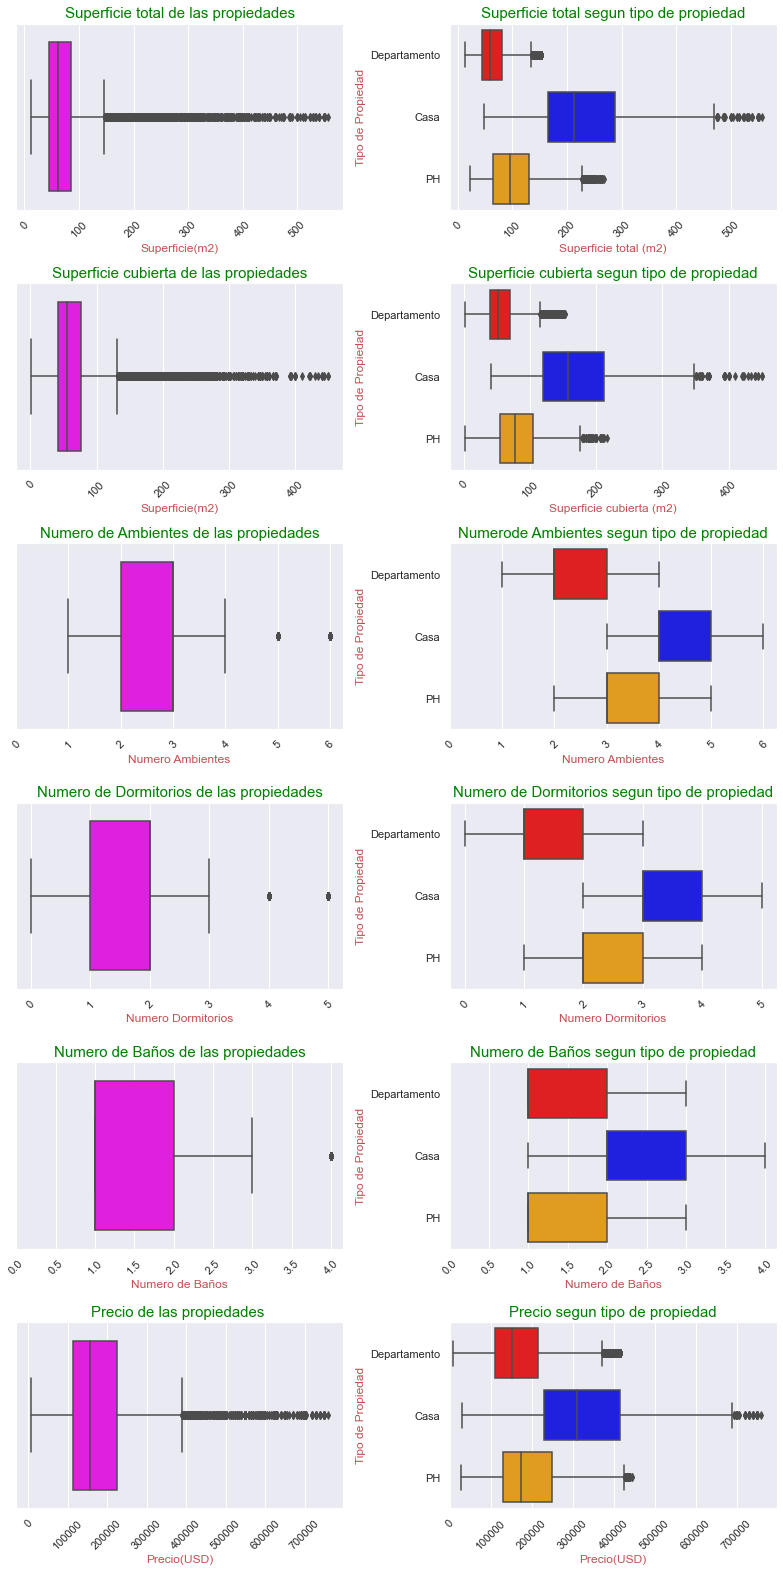

In [76]:
boxplot_comparacion (propie_2)

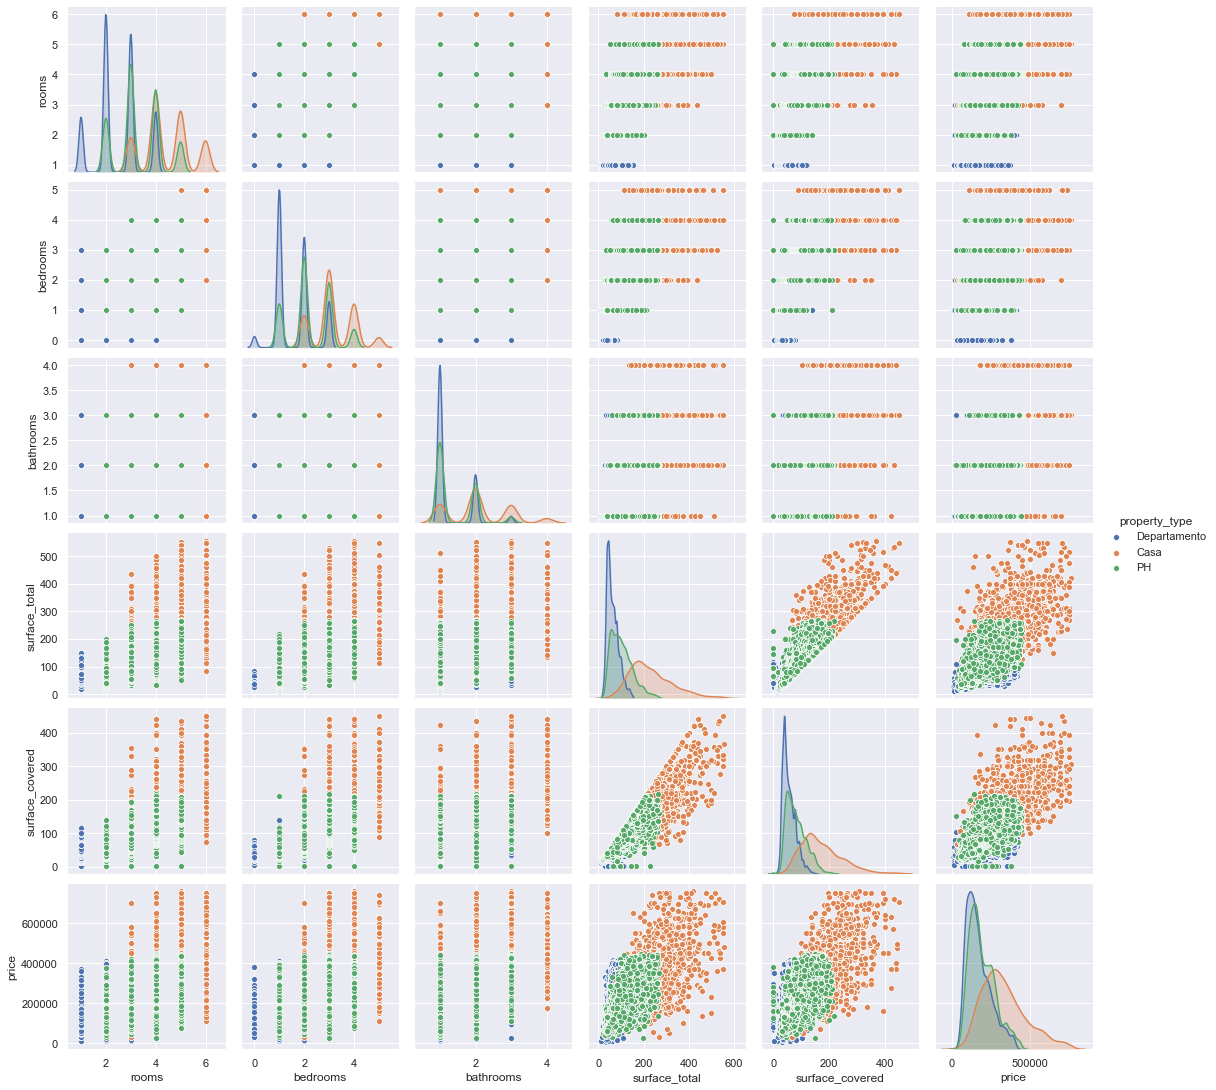

In [77]:
sns.pairplot(propie_2,hue='property_type')

In [78]:
 propie_2.describe(include='all')

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
count,73499,73499.000000,73499.000000,73499.000000,73499.000000,73499.000000,73499.000000,73499
unique,57,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Palermo,NaN,NaN,NaN,NaN,NaN,NaN,Departamento
freq,9760,NaN,NaN,NaN,NaN,NaN,NaN,63525
mean,NaN,2.636879,1.703942,1.325569,72.560106,63.067799,177061.402414,NaN
std,NaN,0.982940,0.847447,0.553272,43.361715,33.042146,84864.915535,NaN
min,NaN,1.000000,0.000000,1.000000,12.000000,1.000000,7500.000000,NaN
25%,NaN,2.000000,1.000000,1.000000,45.687500,41.000000,115000.000000,NaN
50%,NaN,3.000000,2.000000,1.000000,62.000000,55.000000,158000.000000,NaN
75%,NaN,3.000000,2.000000,2.000000,86.000000,77.000000,225000.000000,NaN


#### Estudiando las correlaciones 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.941451,0.517482,0.710780,0.770559,0.616791
bedrooms,0.941451,1.000000,0.522778,0.695636,0.761370,0.600692
bathrooms,0.517482,0.522778,1.000000,0.543092,0.594453,0.600531
surface_total,0.710780,0.695636,0.543092,1.000000,0.925646,0.695458
surface_covered,0.770559,0.761370,0.594453,0.925646,1.000000,0.731797
price,0.616791,0.600692,0.600531,0.695458,0.731797,1.000000


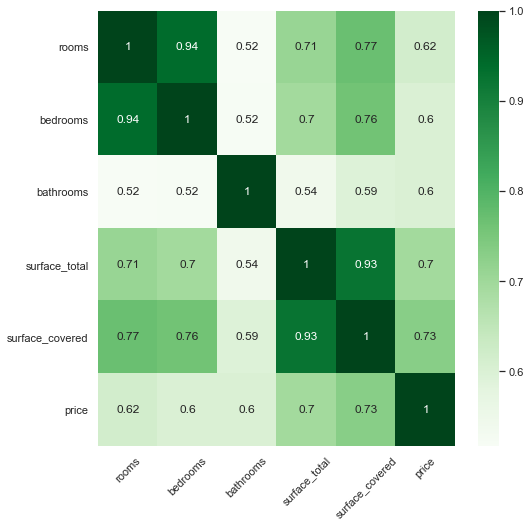

In [79]:
plt.figure (figsize = (8,8)) 
c = propie_2.corr () 
sns.heatmap (c, cmap = 'Greens', annot = True) 
plt.xticks (rotation = 45) 
plt.yticks (rotation = 0) 
c

##### Estudiando las correlaciones segun el tipo de propiedad

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.829845,0.418214,0.483164,0.553704,0.414827
bedrooms,0.829845,1.000000,0.478552,0.477444,0.556652,0.391351
bathrooms,0.418214,0.478552,1.000000,0.461370,0.547939,0.477206
surface_total,0.483164,0.477444,0.461370,1.000000,0.826201,0.580742
surface_covered,0.553704,0.556652,0.547939,0.826201,1.000000,0.620826
price,0.414827,0.391351,0.477206,0.580742,0.620826,1.000000


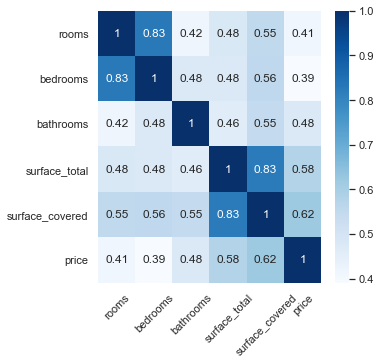

In [80]:
# Casas
plt.figure (figsize = (5,5)) 
c_casa = propie_2.loc[ propie_2['property_type']=='Casa'].corr()
sns.heatmap (c_casa, cmap = 'Blues', annot = True)
plt.xticks (rotation = 45) 
plt.yticks(rotation=0)
c_casa

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.943788,0.474723,0.650617,0.734618,0.592152
bedrooms,0.943788,1.000000,0.463800,0.615720,0.714974,0.574533
bathrooms,0.474723,0.463800,1.000000,0.464779,0.556198,0.545070
surface_total,0.650617,0.615720,0.464779,1.000000,0.811626,0.632015
surface_covered,0.734618,0.714974,0.556198,0.811626,1.000000,0.703657
price,0.592152,0.574533,0.545070,0.632015,0.703657,1.000000


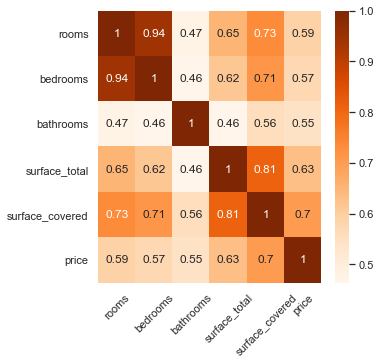

In [81]:
#  PH
plt.figure (figsize = (5,5)) 
c_ph =propie_2.loc[propie_2['property_type']=='PH'].corr()
sns.heatmap (c_ph, cmap = 'Oranges', annot = True)
plt.xticks (rotation = 45) 
c_ph

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.933489,0.490855,0.763572,0.806371,0.590900
bedrooms,0.933489,1.000000,0.496692,0.750759,0.798975,0.573496
bathrooms,0.490855,0.496692,1.000000,0.598018,0.610183,0.582030
surface_total,0.763572,0.750759,0.598018,1.000000,0.935852,0.770484
surface_covered,0.806371,0.798975,0.610183,0.935852,1.000000,0.756774
price,0.590900,0.573496,0.582030,0.770484,0.756774,1.000000


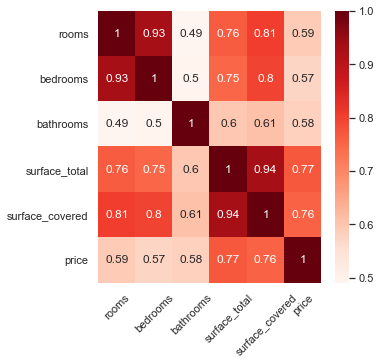

In [82]:
#Departamentos
plt.figure (figsize = (5,5)) 
c_dpto = propie_2.loc[propie_2['property_type']=='Departamento'].corr()
sns.heatmap (c_dpto, cmap = 'Reds', annot = True)
plt.xticks (rotation = 45) 
c_dpto

#### Encoding

In [83]:
propie_3=propie_2.copy()
propie_3.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
11,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento
22,Flores,2.0,1.0,1.0,45.0,45.0,95000.0,Departamento


In [84]:
propie_3= pd.get_dummies(propie_3, columns=["l3","property_type"], prefix=["Barrio:","Propiedad:"])

In [85]:
propie_3.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Barrio:_Abasto,Barrio:_Agronomía,Barrio:_Almagro,Barrio:_Balvanera,...,Barrio:_Villa Pueyrredón,Barrio:_Villa Real,Barrio:_Villa Riachuelo,Barrio:_Villa Santa Rita,Barrio:_Villa Soldati,Barrio:_Villa Urquiza,Barrio:_Villa del Parque,Propiedad:_Casa,Propiedad:_Departamento,Propiedad:_PH
11,2.0,1.0,1.0,68.0,59.0,149000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12,2.0,1.0,1.0,50.0,44.0,115000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20,2.0,1.0,1.0,31.0,31.0,75000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21,1.0,1.0,1.0,22.0,22.0,48000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22,2.0,1.0,1.0,45.0,45.0,95000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Comparacion de Modelos

##### El modelo elegido en el Primer Proyecto fue el de Vecinos mas Cercanos con k_vecinos= 10, y con 4 atributos (superficie cubierta,habitaciones, baños, superficie total)

#####  Al observar la presencia de valores atipicos se elige MAE como metrica de evaluacion en el Primer Proyecto

#### Data del Primer Proyecto

In [86]:
pro_pro_1=pd.read_csv('DS_proyecto_01_Datos_properati.csv')
pro_pro_1.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [87]:
pro_pro_1=pro_pro_1[(pro_pro_1.l2 == 'Capital Federal') &
            (pro_pro_1.property_type.isin(['Departamento','PH','Casa'])) & 
            (pro_pro_1.surface_total >= 15)&
           (pro_pro_1.surface_total <= 1000)&
           (pro_pro_1.price<=4000000) ]

pro_pro_1 = pro_pro_1.loc [:, ['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered', 'price']]
pro_pro_1 = pro_pro_1.dropna(axis=0)

pro_pro_1.shape

(81019, 6)

In [88]:
X=pro_pro_1.loc[:, ['surface_covered' ,'bedrooms','bathrooms', 'surface_total']]
y=pro_pro_1.price

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 4) (56713,) (24306, 4) (24306,)


In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


Modelo: Vecinos mas cercanos,
k-vecinos=10
El error absoluto medio  en Train: 60434.66652795655
El error absoluto medio  en Test: 66565.90155517157
Raíz del error cuadrático medio en Train: 143380.4604908684
Raíz del error cuadrático medio en Test: 162916.538339786


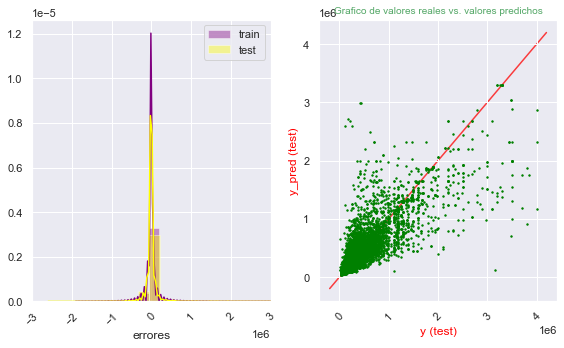

In [91]:
k_vecinos=[10]
for k in k_vecinos:
    knn_reg =  KNeighborsRegressor(n_neighbors= k)
    knn_reg.fit(X_train, y_train)
    
    y_pred_train=knn_reg.predict(X_train) 
    knn_mae_train_1=mean_absolute_error(y_train,y_pred_train)
    knn_rmse_train_1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    y_pred_test=knn_reg.predict(X_test) 
    knn_mae_test_1=mean_absolute_error(y_test,y_pred_test)
    knn_rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Modelo: Vecinos mas cercanos,\nk-vecinos=10')
print(f'El error absoluto medio  en Train:', knn_mae_train_1)
print(f'El error absoluto medio  en Test:', knn_mae_test_1)
print(f'Raíz del error cuadrático medio en Train: {knn_rmse_train_1}')
print(f'Raíz del error cuadrático medio en Test: {knn_rmse_test_1}')
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.distplot(y_train - y_pred_train, bins = 20, label = 'train',color='purple')
sns.distplot(y_test -  y_pred_test, bins = 20, label = 'test',color='yellow')
plt.xlabel('errores')
plt.xticks (rotation = 45)
plt.xlim(xmin=-3000000, xmax=3000000)
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_test, s =2, color='green')
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)', color='red')
plt.ylabel('y_pred (test)',color='red')
plt.xticks (rotation = 45) 
plt.title('Grafico de valores reales vs. valores predichos', color='g', size=10)
plt.tight_layout()

#### Con data obtenido sin filtrar por tipo de propiedad

In [92]:
pr_1_c_e
X=pr_1_c_e.drop(columns = ['price'])
y=pr_1_c_e.price

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50908, 65) (50908,) (21818, 65) (21818,)


Modelo: Vecinos mas cercanos,
k-vecinos=10
El error absoluto medio  en Train: 24129.373273355857
El error absoluto medio  en Test: 26412.119841415348
Raíz del error cuadrático medio en Train: 36869.46613287489
Raíz del error cuadrático medio en Test: 40385.45738772989


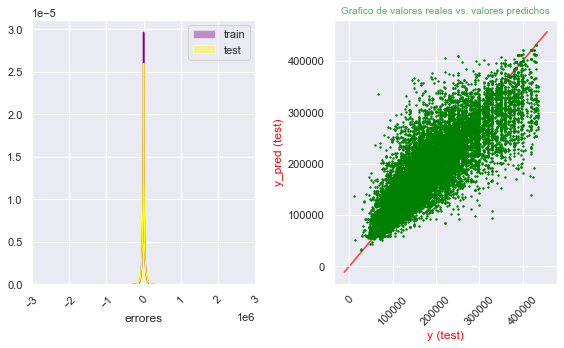

In [94]:
k_vecinos=[10]
for k in k_vecinos:
    knn_reg =  KNeighborsRegressor(n_neighbors= k)
    knn_reg.fit(X_train, y_train)
    
    y_pred_train=knn_reg.predict(X_train) 
    knn_mae_train_2=mean_absolute_error(y_train,y_pred_train)
    knn_rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    y_pred_test=knn_reg.predict(X_test) 
    knn_mae_test_2=mean_absolute_error(y_test,y_pred_test)
    knn_rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Modelo: Vecinos mas cercanos,\nk-vecinos=10')
print(f'El error absoluto medio  en Train:', knn_mae_train_2)
print(f'El error absoluto medio  en Test:', knn_mae_test_2)
print(f'Raíz del error cuadrático medio en Train: {knn_rmse_train_2}')
print(f'Raíz del error cuadrático medio en Test: {knn_rmse_test_2}')
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.distplot(y_train - y_pred_train, bins = 20, label = 'train',color='purple')
sns.distplot(y_test -  y_pred_test, bins = 20, label = 'test',color='yellow')
plt.xlabel('errores')
plt.xticks (rotation = 45)
plt.xlim(xmin=-3000000, xmax=3000000)
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_test, s =2, color='green')
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)', color='red')
plt.ylabel('y_pred (test)',color='red')
plt.xticks (rotation = 45) 
plt.title('Grafico de valores reales vs. valores predichos', color='g', size=10)
plt.tight_layout()

#### Con data obtenido filtrando por tipo de propiedad

In [95]:
X=propie_3.drop(columns = ['price'])
y=propie_3.price

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(51449, 65) (51449,) (22050, 65) (22050,)


Modelo: Vecinos mas cercanos,
k-vecinos=10
El error absoluto medio  en Train: 24672.02159225641
El error absoluto medio  en Test: 27702.53307936508
Raíz del error cuadrático medio en Train: 38595.911625296554
Raíz del error cuadrático medio en Test: 43315.295426423734


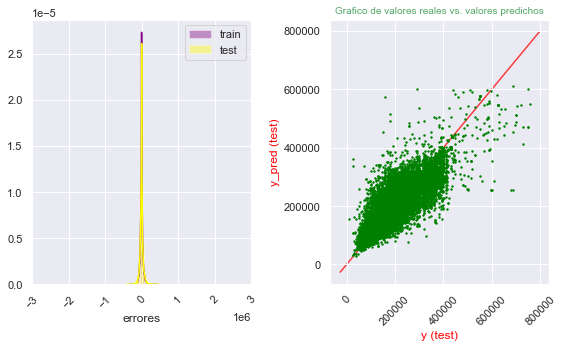

In [97]:
k_vecinos=[10]
for k in k_vecinos:
    knn_reg =  KNeighborsRegressor(n_neighbors= k)
    knn_reg.fit(X_train, y_train)
    
    y_pred_train=knn_reg.predict(X_train) 
    knn_mae_train_3=mean_absolute_error(y_train,y_pred_train)
    knn_rmse_train_3 = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    y_pred_test=knn_reg.predict(X_test) 
    knn_mae_test_3=mean_absolute_error(y_test,y_pred_test)
    knn_rmse_test_3 = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Modelo: Vecinos mas cercanos,\nk-vecinos=10')
print(f'El error absoluto medio  en Train:', knn_mae_train_3)
print(f'El error absoluto medio  en Test:', knn_mae_test_3)
print(f'Raíz del error cuadrático medio en Train: {knn_rmse_train_3}')
print(f'Raíz del error cuadrático medio en Test: {knn_rmse_test_3}')
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.distplot(y_train - y_pred_train, bins = 20, label = 'train',color='purple')
sns.distplot(y_test -  y_pred_test, bins = 20, label = 'test',color='yellow')
plt.xlabel('errores')
plt.xticks (rotation = 45)
plt.xlim(xmin=-3000000, xmax=3000000)
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_test, s =2, color='green')
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)', color='red')
plt.ylabel('y_pred (test)',color='red')
plt.xticks (rotation = 45) 
plt.title('Grafico de valores reales vs. valores predichos', color='g', size=10)
plt.tight_layout()

#### Arboles de decisión. Profundidad elegida: 5  y con 4 atributos (superficie cubierta, habitaciones, baños, superficie total)¶. Esto se realiza porque asi lo solicita el proyecto

In [98]:
from sklearn.tree import DecisionTreeRegressor

##### Data del Primer Proyecto

In [99]:
X=pro_pro_1.loc[:, ['surface_covered' ,'bedrooms','bathrooms', 'surface_total']]
y=pro_pro_1.price

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 4) (56713,) (24306, 4) (24306,)


Modelo: Árbol de decision,
Profundidad=5
El error absoluto medio  en Train: 79228.27944380205
El error absoluto medio  en Test: 80405.8638776524
Raíz del error cuadrático medio en Train: 169576.12695167717
Raíz del error cuadrático medio en Test: 173587.6077620492


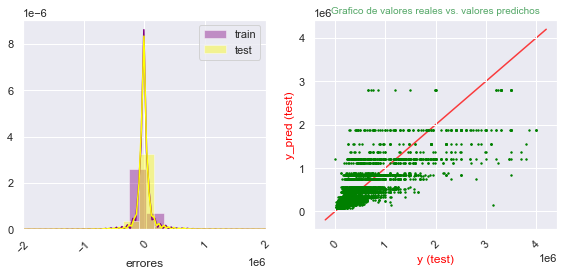

In [101]:
max_depths=[5]
for max_depth in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    tree_reg.fit(X_train, y_train)
   
    y_pred_train=tree_reg.predict(X_train)
    tree_mae_train_1=mean_absolute_error(y_train,y_pred_train)
    tree_rmse_train_1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
    y_pred_test=tree_reg.predict(X_test) 
    tree_mae_test_1=mean_absolute_error(y_test,y_pred_test)
    tree_rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
print('Modelo: Árbol de decision,\nProfundidad=5') 
print(f'El error absoluto medio  en Train:',tree_mae_train_1)
print(f'El error absoluto medio  en Test:', tree_mae_test_1)
print(f'Raíz del error cuadrático medio en Train: {tree_rmse_train_1}')
print(f'Raíz del error cuadrático medio en Test: {tree_rmse_test_1}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_pred_train, bins = 20, label = 'train',color='purple')
sns.distplot(y_test -  y_pred_test, bins = 20, label = 'test',color='yellow')
plt.xlabel('errores')
plt.xlim(xmin=-2000000, xmax=2000000)
plt.legend()
plt.xticks (rotation = 45) 

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_test, s =2, color='green')
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)', color='red')
plt.ylabel('y_pred (test)',color='red')
plt.xticks (rotation = 45) 
plt.title('Grafico de valores reales vs. valores predichos', color='g', size=10)
plt.tight_layout()

##### Con data obtenido sin filtrar por tipo de propiedad

In [102]:
pr_1_c_e
X=pr_1_c_e.drop(columns = ['price'])
y=pr_1_c_e.price

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50908, 65) (50908,) (21818, 65) (21818,)


Modelo: Árbol de decision,
Profundidad=5
El error absoluto medio  en Train: 35625.02301190054
El error absoluto medio  en Test: 35505.87330062233
Raíz del error cuadrático medio en Train: 48407.12596695954
Raíz del error cuadrático medio en Test: 48313.460141898315


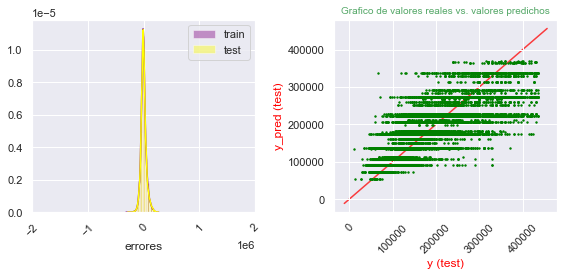

In [104]:
max_depths=[5]
for max_depth in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    tree_reg.fit(X_train, y_train)
   
    y_pred_train=tree_reg.predict(X_train)
    tree_mae_train_2=mean_absolute_error(y_train,y_pred_train)
    tree_rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_pred_train))
    y_pred_test=tree_reg.predict(X_test) 
    tree_mae_test_2=mean_absolute_error(y_test,y_pred_test)
    tree_rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
print('Modelo: Árbol de decision,\nProfundidad=5') 
print(f'El error absoluto medio  en Train:',tree_mae_train_2)
print(f'El error absoluto medio  en Test:', tree_mae_test_2)
print(f'Raíz del error cuadrático medio en Train: {tree_rmse_train_2}')
print(f'Raíz del error cuadrático medio en Test: {tree_rmse_test_2}')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_pred_train, bins = 20, label = 'train',color='purple')
sns.distplot(y_test -  y_pred_test, bins = 20, label = 'test',color='yellow')
plt.xlabel('errores')
plt.xlim(xmin=-2000000, xmax=2000000)
plt.legend()
plt.xticks (rotation = 45) 

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_test, s =2, color='green')
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)', color='red')
plt.ylabel('y_pred (test)',color='red')
plt.xticks (rotation = 45) 
plt.title('Grafico de valores reales vs. valores predichos', color='g', size=10)
plt.tight_layout()

##### Con data obtenido filtrando por tipo de propiedad

In [105]:
propie_3.head()
X=propie_3.drop(columns = ['price'])
y=propie_3.price

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(51449, 65) (51449,) (22050, 65) (22050,)


Modelo: Árbol de decision,
Profundidad=5
El error absoluto medio  en Train: 36387.0647835503
El error absoluto medio  en Test: 36819.868641235356
Raíz del error cuadrático medio en Train: 49882.11555764051
Raíz del error cuadrático medio en Test: 50689.90023353376


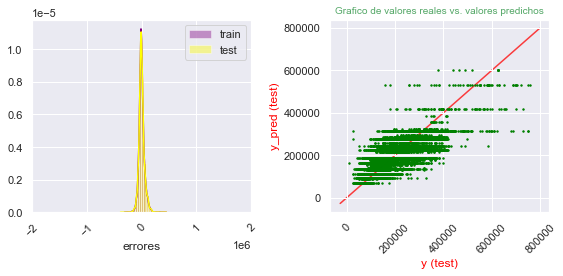

In [107]:
max_depths=[5]
for max_depth in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    tree_reg.fit(X_train, y_train)
   
    y_pred_train=tree_reg.predict(X_train)
    tree_mae_train_3=mean_absolute_error(y_train,y_pred_train)
    tree_rmse_train_3 = np.sqrt(mean_squared_error(y_train, y_pred_train))
    y_pred_test=tree_reg.predict(X_test) 
    tree_mae_test_3=mean_absolute_error(y_test,y_pred_test)
    tree_rmse_test_3 = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
print('Modelo: Árbol de decision,\nProfundidad=5') 
print(f'El error absoluto medio  en Train:',tree_mae_train_3)
print(f'El error absoluto medio  en Test:', tree_mae_test_3)
print(f'Raíz del error cuadrático medio en Train: {tree_rmse_train_3}')
print(f'Raíz del error cuadrático medio en Test: {tree_rmse_test_3}')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_pred_train, bins = 20, label = 'train',color='purple')
sns.distplot(y_test -  y_pred_test, bins = 20, label = 'test',color='yellow')
plt.xlabel('errores')
plt.xlim(xmin=-2000000, xmax=2000000)
plt.legend()
plt.xticks (rotation = 45) 

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_pred_test, s =2, color='green')
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)', color='red')
plt.ylabel('y_pred (test)',color='red')
plt.xticks (rotation = 45) 
plt.title('Grafico de valores reales vs. valores predichos', color='g', size=10)
plt.tight_layout()

#### Comparacion de resultados Obtenidos

###### A pesar de haberse realizado con las dos metricas, se comparara con MAE, ya que en los datos del Primer Proyecto no existio un preprocesamiento adecuado, y hay presencia de valores atipicos., y por lo tanto MAE fue la metrica de Evaluacion elegida


In [108]:
result_d= {'Modelo':['knn_1', 'tree_1','knn_1', 'tree_1','knn_2', 'tree_2','knn_2', 'tree_2','knn_3', 'tree_3','knn_3', 'tree_3'],
          'Error':[knn_mae_train_1,tree_mae_train_1,knn_mae_test_1,tree_mae_test_1,knn_mae_train_2,tree_mae_train_2,knn_mae_test_2,tree_mae_test_2,knn_mae_train_3,
                   tree_mae_train_3,knn_mae_test_3,tree_mae_test_3],
          'Resultado':['train','train','test','test','train','train','test','test','train','train','test','test']}
tabla=pd.DataFrame(result_d)
tabla

,Modelo,Error,Resultado
0,knn_1,60434.666528,train
1,tree_1,79228.279444,train
2,knn_1,66565.901555,test
3,tree_1,80405.863878,test
4,knn_2,24129.373273,train
5,tree_2,35625.023012,train
6,knn_2,26412.119841,test
7,tree_2,35505.873301,test
8,knn_3,24672.021592,train
9,tree_3,36387.064784,train


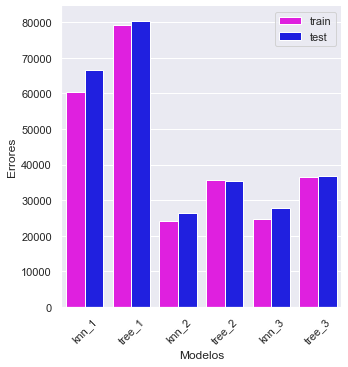

In [109]:
my_pal={'train':'magenta','test':'blue'}
sns.catplot(x='Modelo', y='Error' ,palette=my_pal, hue='Resultado',kind='bar', data=tabla, legend=False)
plt.xlabel('Modelos')
plt.xticks (rotation = 45)
plt.ylabel('Errores')
plt.ylim(ymin=0)
plt.legend(loc='best') 

### Segun los resultados obtenidos, podemos concluir
##### 1) Que los modelos con el preprocesamiento de datos (2 y 3), han predecido mejor que los modelos del primer proyecto, donde no se realizo, tanto en Vecinos mas cercanos como en Arboles de Decision .
##### 2) El modelo elegido en el primer Proyecto es el de Vecinos mas Cercanos con k_vecinos= 10, y con 4 atributos (habitaciones, baños, superficie total, superficie cubierta), en esta etapa elegiria nuevamente Vecinos mas Cercanos con k_vecinos= 10, y con todos los atributos, pero con la transformacion de datos sin distinguir el tipo de propiedad
##### 3) Ya que la consigna pide evaluar con Arboles de Decision . el modelo no es mejor predictor que el de Vecinos mas Cercanos. En el Primer Proyecto el Arboles de Decision con max_depths=5 y con 4 atributos (superficie cubierta, habitaciones, baños, superficie total) fue el mejor predictor de Arboles. En este Proyecto resulto ser   Arboles de Decision con max_depths=5 y con todos los atributos, pero con la transformacion de datos sin distinguir el tipo de propiedad.

#### Como indicamos en la Introduccion el preprocesamiento de  datos, es uno de los pasos más importantes en cualquier aplicación de Machine Learning. Usualmente los datos se presentan en formatos no óptimos (o incluso inadecuados) para ser procesados por el modelo. En estos casos el preprocesamiento de datos es una tarea que se debe realizar de manera obligatoria. Los datos sin procesar son a menudo ruidosos no confiables y es posible que les falten valores. El uso de estos datos para el modelado puede producir resultados engañosos. Estas tareas forman parte del proceso de ciencia de datos y normalmente siguen una exploración inicial de un conjunto de datos que se usa para detectar y planear el procesamiento previo necesario. Los datos de calidad son un requisito previo para los modelos predictivos de calidad. Para evitar la "entrada y salida de elementos no utilizados" y mejorar la calidad de los datos y, por tanto, el rendimiento del modelo, es fundamental llevar a cabo una pantalla de mantenimiento de datos para detectar problemas de datos al principio y decidir acerca de los pasos de limpieza y preprocesamiento de datos correspondientes. La exploración de los datos ofrece una vista anticipada de los datos. Se pueden detectar una serie de problemas de datos durante este paso y se pueden aplicar los métodos correspondientes para solucionarlos. Es importante formular preguntas como ¿cuál es la causa del problema y cómo se ha podido producir el problema? Este proceso también le ayuda a decidir acerca de los pasos de procesamiento de datos que deben llevarse a cabo para resolverlos. La identificación de los casos de uso finales y los roles también se puede usar para priorizar el esfuerzo de procesamiento de datos.

## Parte B- Modelos Avanzados

In [110]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures 

### Data filtrado por tipo de propiedad

####  Regresion polinomica  por sus argumentos por defecto y Validacion cruzada

In [111]:
propie_3_rlp=propie_3.copy()


In [112]:
X=propie_3_rlp.drop(columns = ['price'])
y=propie_3_rlp.price

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [114]:
reg = LinearRegression()
columns=["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]
transformer= make_column_transformer((PolynomialFeatures(include_bias=False), columns),remainder= 'passthrough')
#poly = PolynomialFeatures(include_bias=False)
X_train_new = transformer.fit_transform(X_train)
X_test_new = transformer.transform(X_test)
print(X_train_new.shape,X_test_new.shape )

(51449, 80) (22050, 80)


In [115]:
#Instancio y entreno modelo
reg_1  = LinearRegression()
reg_1.fit(X_train_new, y_train)

LinearRegression()

In [116]:
#Cross Validation ##Ver cv a elegir
reg_score_train = abs(cross_val_score(reg_1  , X_train_new , y_train, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE train:%0.2f (+/- %0.2f)'% (reg_score_train.mean(),reg_score_train.std()))
reg_score_test = abs(cross_val_score(reg_1  , X_test_new , y_test, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE test:%0.2f (+/- %0.2f)'% (reg_score_test.mean(),reg_score_test.std()))

RMSE train:41869.89 (+/- 245.89)
RMSE test:42723.17 (+/- 954.93)


In [117]:
y_train_pred=reg_1.predict(X_train_new)
y_test_pred=reg_1.predict(X_test_new)

Raíz del error cuadrático medio en Train: 41774.523515371606
Raíz del error cuadrático medio en Test: 42590.761396662296
El error absoluto medio en Train: 30478.907561264918
El error absoluto medio en Test: 30914.547180040154


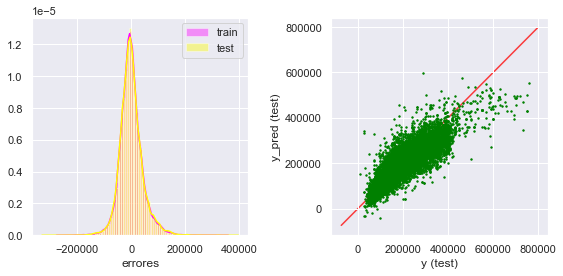

In [118]:
rmse_train_3_rlp = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_3_rlp = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train_3_rlp = mean_absolute_error(y_train, y_train_pred)
mae_test_3_rlp= mean_absolute_error(y_test, y_test_pred)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_3_rlp}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_3_rlp}')
print(f'El error absoluto medio en Train: {mae_train_3_rlp}')
print(f'El error absoluto medio en Test: {mae_test_3_rlp }')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

##### Regularizacion
###### Ridge nos va a servir de ayuda cuando sospechemos que varios de los atributos de entrada (features) estén correlados entre ellos. Ridge hace que los coeficientes acaben siendo más pequeños. Esta disminución de los coeficientes minimiza el efecto de la correlación entre los atributos de entrada y hace que el modelo generalice mejor. Ridge funciona mejor cuando la mayoría de los atributos son relevantes.


In [119]:
reg_rd = Ridge () # aplicar con colums_transformer
reg_rd.fit(X_train_new,y_train)

print(f'Pendientes: {reg_rd.coef_}')
print(f'Ordenada: {reg_rd.intercept_}')

Pendientes: [ 7.79723855e+03  4.73135215e+03  2.37521305e+04  1.16958929e+03
  1.42460206e+03  6.08313142e+02  9.86200796e+02  1.42444898e+03
  1.13816503e+02 -2.92357802e+02 -2.99993972e+03 -3.78749652e+03
 -2.37176334e+02  3.48574417e+02  9.92113432e+02  9.93756893e+01
 -1.15083346e+02 -3.37052561e+00  5.66736958e+00 -4.64110737e+00
  6.26689664e+03  8.37936662e+03  6.83897088e+03 -1.57776468e+04
  5.15635762e+03  4.48327228e+04  5.42742491e+04 -3.70515992e+04
 -6.24447154e+03  1.76834410e+04 -8.30716808e+03 -7.95478447e+03
  1.13082955e+04  3.69847812e+04  3.18445376e+04 -1.61587541e+04
 -3.46326367e+04 -1.31566696e+04 -3.08869866e+04  6.74596652e+04
 -7.36537114e+03 -2.90920376e+04 -1.65036568e+04 -6.10973471e+03
  5.36536262e+04 -2.17211873e+04  5.34100113e+04 -3.96330253e+04
  8.39739943e+03 -2.01421447e+04  5.84326778e+03 -2.41086555e+04
 -6.43404242e+03 -6.68341516e+04  1.59666009e+05  5.69714908e+04
  2.68283584e+04  2.11614598e+04 -1.85807890e+04 -9.73176672e+03
  1.35819029e

Raíz del error cuadrático medio en Train: 41774.699409992085
Raíz del error cuadrático medio en Test: 42590.25298462273
El error absoluto medio  en Train: 30476.2005045898
El error absoluto medio  en Test: 30910.86187997699


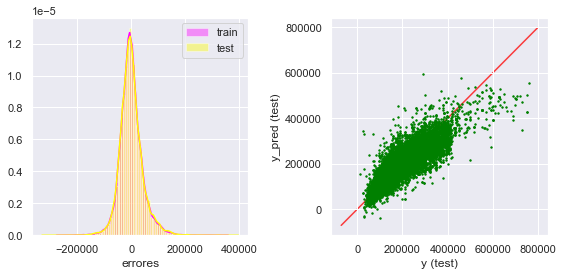

In [120]:
y_train_pred_rd=reg_rd.predict(X_train_new)
y_test_pred_rd=reg_rd.predict(X_test_new)
rmse_train_3_rd = np.sqrt(mean_squared_error(y_train, y_train_pred_rd))
rmse_test_3_rd = np.sqrt(mean_squared_error(y_test, y_test_pred_rd))
mae_train_3_rd=mean_absolute_error(y_train,y_train_pred_rd)
mae_test_3_rd=mean_absolute_error(y_test, y_test_pred_rd)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_3_rd}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_3_rd}')
print(f'El error absoluto medio  en Train:',mae_train_3_rd)
print(f'El error absoluto medio  en Test:', mae_test_3_rd)

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_rd, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred_rd, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_rd, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

##### Optimizando los hiperparametros

In [121]:
propi_d=propie_3.copy()

In [122]:
X=propi_d.drop(columns = ['price'])
y=propi_d.price

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [124]:
# Seleccionamos las columnas
numerical_columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
categorical_columns = ['l3', 'property_type' ]
# Instanciamos el preprocesador
preprocessor = make_column_transformer((PolynomialFeatures(), numerical_columns),remainder= 'passthrough')
# Regresor 
regressor = LinearRegression()
# Pipeline
pipeline_poly = make_pipeline(preprocessor, regressor)
# GridSearch
params = {'columntransformer__polynomialfeatures__degree': [1, 2, 3, 4, 5]}
gs2 = GridSearchCV(estimator=pipeline_poly,
                  param_grid=params,
                  scoring='neg_root_mean_squared_error',
                  cv=5)

In [125]:
gs2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('polynomialfeatures',
                                                                         PolynomialFeatures(),
                                                                         ['rooms',
                                                                          'bedrooms',
                                                                          'bathrooms',
                                                                          'surface_total',
                                                                          'surface_covered'])])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'columntransformer__polynomialfeatures__degree': [1, 2

In [126]:
gs2.best_params_

{'columntransformer__polynomialfeatures__degree': 3}

In [127]:
print('mejores parametros:'+str (gs2.best_params_))
print('Mejor Score:'+ str (abs(gs2.best_score_)))

mejores parametros:{'columntransformer__polynomialfeatures__degree': 3}
Mejor Score:41503.99168631561


In [128]:
pd.DataFrame(gs2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.502599,0.035292,0.022800,0.002041,1,{'columntransformer__polynomialfeatures__degre...,-43931.044064,-43910.155174,-42793.048619,-43974.681861,-43133.952140,-43548.576372,490.167745,4
1,0.674600,0.055905,0.034800,0.002225,2,{'columntransformer__polynomialfeatures__degre...,-42142.009596,-41987.645928,-41451.252590,-42023.444813,-41745.114284,-41869.893442,245.894642,3
2,1.287000,0.222079,0.058203,0.007781,3,{'columntransformer__polynomialfeatures__degre...,-42109.851866,-41600.186941,-41118.121315,-41592.984053,-41098.814257,-41503.991686,373.444620,1
3,2.172002,0.193139,0.095198,0.006766,4,{'columntransformer__polynomialfeatures__degre...,-43994.716779,-41551.897152,-40746.937263,-42081.374409,-40920.120943,-41859.009309,1168.180304,2
4,3.528200,0.246920,0.141199,0.006554,5,{'columntransformer__polynomialfeatures__degre...,-61537.675863,-42837.142081,-41436.747169,-46802.737059,-43565.050215,-47235.870477,7364.547588,5


##### Aplicando el mejor hiperparametro. degree=3

In [129]:
propie_rpl_3=propie_3.copy()

In [130]:
X=propie_rpl_3.drop(columns = ['price'])
y=propie_rpl_3.price

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [132]:
# genero los caracteres del polinomio

categorical_columns = ['l3', 'property_type']
numerical_columns = ['rooms', 'bedrooms', 'bathrooms', 
                     'surface_total', 'surface_covered']
preprocessor = make_column_transformer((PolynomialFeatures(include_bias=False, degree=3), numerical_columns),remainder= 'passthrough')
#nuevo test y train
X_train_new = preprocessor.fit_transform (X_train)
X_test_new = preprocessor.transform (X_test)
print(X_train_new.shape,X_test_new.shape )

(51449, 115) (22050, 115)


In [133]:
reg_2  = LinearRegression()
reg_2.fit(X_train_new, y_train)

LinearRegression()

In [134]:
#Cross Validation 
reg_score_train = abs(cross_val_score(reg_2  , X_train_new , y_train, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE train:%0.2f (+/- %0.2f)'% (reg_score_train.mean(),reg_score_train.std()))
reg_score_test = abs(cross_val_score(reg_2  , X_test_new , y_test, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE test:%0.2f (+/- %0.2f)'% (reg_score_test.mean(),reg_score_test.std()))

RMSE train:41503.99 (+/- 373.44)
RMSE test:41839.13 (+/- 749.81)


In [135]:
y_train_pred=reg_2.predict(X_train_new)
y_test_pred=reg_2.predict(X_test_new)

Raíz del error cuadrático medio en Train: 41211.920011563365
Raíz del error cuadrático medio en Test: 41642.591931751405
El error absoluto medio en Train: 30060.787201020616
El error absoluto medio en Test: 30461.704110050603


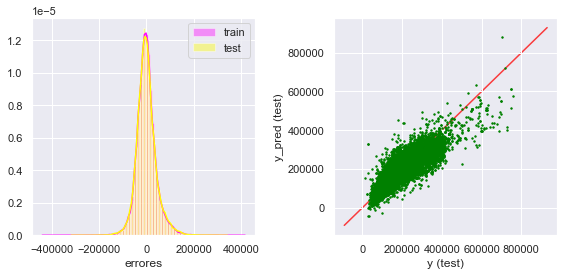

In [136]:
rmse_train_rpl_3 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_rpl_3 = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train_rpl_3 = mean_absolute_error(y_train, y_train_pred)
mae_test_rpl_3 = mean_absolute_error(y_test, y_test_pred)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_rpl_3}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_rpl_3}')
print(f'El error absoluto medio en Train: {mae_train_rpl_3}')
print(f'El error absoluto medio en Test: {mae_test_rpl_3 }')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

##### Buscando el mejor hiperparametro alpha para regularizar con Ridge

In [137]:
ridge= Ridge()
params={'alpha': np.logspace(-1,2,20)}
reg_rd.fit(X_train_new,y_train)
reg_rd_2 = GridSearchCV(ridge,
                  param_grid=params,
                  scoring='neg_root_mean_squared_error',
                  cv=5)

In [138]:
reg_rd_2.fit (X_train_new,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ])},
             scoring='neg_root_mean_squared_error')

In [139]:
reg_rd_2.best_params_

{'alpha': 1.2742749857031335}

In [140]:
print('mejores parametros:'+str (reg_rd_2.best_params_))
print('Mejor Score:'+ str (abs(reg_rd_2.best_score_)))

mejores parametros:{'alpha': 1.2742749857031335}
Mejor Score:41501.78478886128


In [141]:
pd.DataFrame(reg_rd_2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.366199,0.033410,0.007398,0.000489,0.1,{'alpha': 0.1},-42106.283316,-41600.417665,-41119.107311,-41593.049435,-41098.890291,-41503.549604,372.082412,10
1,0.378399,0.010012,0.009800,0.002135,0.143845,{'alpha': 0.14384498882876628},-42104.828857,-41600.521048,-41119.513381,-41593.096083,-41098.937562,-41503.379386,371.524791,9
2,0.408798,0.018902,0.010201,0.003060,0.206914,{'alpha': 0.20691380811147897},-42102.843635,-41600.671545,-41120.071296,-41593.179716,-41099.018760,-41503.156990,370.761274,8
3,0.426599,0.035219,0.007599,0.000797,0.297635,{'alpha': 0.29763514416313175},-42100.190510,-41600.890779,-41120.822975,-41593.329905,-41099.160000,-41502.878834,369.736271,7
4,0.382999,0.011881,0.007198,0.000747,0.428133,{'alpha': 0.42813323987193935},-42096.744606,-41601.209603,-41121.808096,-41593.597372,-41099.406451,-41502.553226,368.396441,5
5,0.377600,0.019734,0.008002,0.000633,0.615848,{'alpha': 0.6158482110660264},-42092.435357,-41601.670602,-41123.049940,-41594.065130,-41099.833130,-41502.210832,366.705671,4
6,0.354001,0.010990,0.007800,0.001167,0.885867,{'alpha': 0.8858667904100825},-42087.304090,-41602.329939,-41124.532412,-41594.861870,-41100.558062,-41501.917275,364.666334,2
7,0.354599,0.009625,0.007402,0.000492,1.27427,{'alpha': 1.2742749857031335},-42081.560685,-41603.258714,-41126.171533,-41596.177145,-41101.755867,-41501.784789,362.341116,1
8,0.382601,0.012548,0.008600,0.001854,1.83298,{'alpha': 1.8329807108324356},-42075.611853,-41604.548340,-41127.794649,-41598.282593,-41103.671611,-41501.981809,359.864476,3
9,0.355399,0.009046,0.007601,0.001199,2.63665,{'alpha': 2.636650898730358},-42070.045634,-41606.333622,-41129.152302,-41601.574923,-41106.643455,-41502.749987,357.434163,6


##### Regularizando con el mejor alpha

In [142]:
reg_2_rd = Ridge (alpha=1.2742749857031335)
reg_2_rd.fit(X_train_new,y_train)

print(f'Pendientes: {reg_2_rd.coef_}')
print(f'Ordenada: {reg_2_rd.intercept_}')

Pendientes: [-1.30495045e+04  1.07953222e+04 -7.73954752e+04  2.14581020e+03
  1.51145456e+03  6.14320768e+02 -8.00212372e+03  3.39828626e+04
 -1.41640580e+02  1.70445715e+01  6.64620208e+03 -8.37051039e+03
  4.91593271e+02 -6.47842096e+02  3.58367613e+04 -4.88510277e+02
  3.17607161e+02 -1.60404944e+01  2.39151855e+01 -1.68895432e+01
  9.98734285e+02  5.70654914e+02 -9.72759689e+03  8.45750843e+01
 -7.55240893e+01  7.93559529e+02  2.85090631e+03 -2.39616661e+02
  2.57188100e+02  1.67076722e+03  1.77456988e+02 -5.28588865e+00
  1.15973852e+00 -3.93751801e+00  1.72148149e+00 -1.89930867e+03
  1.87612332e+03  1.84390495e+01 -3.76676057e+01  3.24808143e+02
 -3.98421632e+01 -1.04595286e+02  6.63075556e-01  6.38669180e-01
  5.43339253e-01 -7.08445468e+03  1.09758539e+02 -1.16447641e+02
 -7.12836819e-01 -1.04249879e+00  1.91698507e+00  3.04486518e-02
 -9.85555658e-02  1.45161367e-01 -7.11655721e-02  5.62811832e+03
  6.55588673e+03  6.82236828e+03 -1.53169708e+04  4.60893099e+03
  4.47795936e

Raíz del error cuadrático medio en Train: 41213.217922145486
Raíz del error cuadrático medio en Test: 41641.12026439018
El error absoluto medio en Train: 30060.19317073855
El error absoluto medio en Test: 30458.177798767934


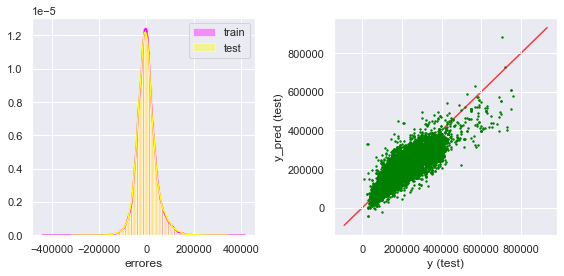

In [143]:
y_train_pred_rd=reg_2_rd.predict(X_train_new)
y_test_pred_rd=reg_2_rd.predict(X_test_new)
rmse_train_rd_3 = np.sqrt(mean_squared_error(y_train, y_train_pred_rd))
rmse_test_rd_3 = np.sqrt(mean_squared_error(y_test, y_test_pred_rd))
mae_train_rd_3 = mean_absolute_error(y_train, y_train_pred_rd)
mae_test_rd_3 =mean_absolute_error(y_test, y_test_pred_rd)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_rd_3}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_rd_3}')
print(f'El error absoluto medio en Train: {mae_train_rd_3}')
print(f'El error absoluto medio en Test: {mae_test_rd_3 }')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_rd, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred_rd, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_rd, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

#### XGBoost

In [144]:
import xgboost as xgb
from xgboost import XGBRegressor

In [145]:
propie_3_xgb=propie_3.copy()

In [146]:
X=propie_3_xgb.drop(columns = ['price'])
y=propie_3_xgb.price

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [148]:
xgb_reg=XGBRegressor(objective = 'reg:squarederror')

In [149]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
#Cross Validation ##Ver cv a elegir
xgb_score_train = abs(cross_val_score(xgb_reg , X_train, y_train, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE train:%0.2f (+/- %0.2f)'% (xgb_score_train .mean(),xgb_score_train .std()))
xgb_score_test = abs(cross_val_score(xgb_reg , X_test , y_test, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE test:%0.2f (+/- %0.2f)'% (xgb_score_test.mean(),xgb_score_test.std()))

RMSE train:36708.95 (+/- 648.60)
RMSE test:37428.63 (+/- 736.67)


In [151]:
y_train_pred=xgb_reg.predict(X_train)
y_test_pred=xgb_reg.predict(X_test)

Raíz del error cuadrático medio en Train: 32992.820891360025
Raíz del error cuadrático medio en Test: 36840.921801943296
El error absoluto medio en Train: 23787.35020386542
El error absoluto medio en Test: 25808.19247962727


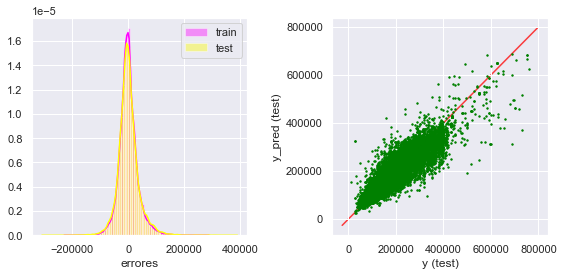

In [152]:
rmse_train_3_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_3_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train_3_xgb = mean_absolute_error(y_train, y_train_pred)
mae_test_3_xgb = mean_absolute_error(y_test, y_test_pred)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_3_xgb}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_3_xgb}')
print(f'El error absoluto medio en Train: {mae_train_3_xgb}')
print(f'El error absoluto medio en Test: {mae_test_3_xgb }')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

##### Optimizando hiperparametros

In [153]:
 from sklearn.model_selection import RandomizedSearchCV

In [154]:
propi_h=propie_3.copy()

In [155]:
X=propi_h.drop(columns = ['price'])
y=propi_h.price

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [157]:
param_grid = {'nthread': [4],
              'objective': ['reg:squarederror'],
              'learning_rate': [0.1,0.2,0.3],
              'max_depth':[4,5,6],
              'min_child_weight': [1,2,3,4],
              'subsample':[0.5,0.7,1],
              'colsample_bytree':[0.7,1],
              'reg_lambda':[1,2,3],
              'n_estimators':[100,200,300]} 
xgb_reg=XGBRegressor()
rs1 = RandomizedSearchCV(xgb_reg, param_grid, scoring='neg_root_mean_squared_error', cv=5,random_state=42)

In [158]:
rs1.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [159]:
rs1.best_params_

{'subsample': 1,
 'reg_lambda': 2,
 'objective': 'reg:squarederror',
 'nthread': 4,
 'n_estimators': 300,
 'min_child_weight': 4,
 'max_depth': 5,
 'learning_rate': 0.3,
 'colsample_bytree': 0.7}

##### Aplicando los mejores hiperparametros

In [160]:
propie_xgb_3=propie_3.copy()

In [161]:
X=propie_xgb_3.drop(columns = ['price'])
y=propie_xgb_3.price

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [163]:
xgb_reg_h=XGBRegressor(colsample_bytree= 0.7,
                       learning_rate= 0.3,
                       max_depth= 5,
                       min_child_weight=4,
                       n_estimators= 300,
                       nthread= 4,
                       objective= 'reg:squarederror',
                       reg_lambda= 2,
                       subsample= 1)

In [164]:
xgb_reg_h.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [165]:
#Cross Validation ##Ver cv a elegir
xgb_score_train = abs(cross_val_score(xgb_reg_h , X_train, y_train, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE train:%0.2f (+/- %0.2f)'% (xgb_score_train .mean(),xgb_score_train .std()))
xgb_score_test = abs(cross_val_score(xgb_reg_h , X_test , y_test, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE test:%0.2f (+/- %0.2f)'% (xgb_score_test.mean(),xgb_score_test.std()))

RMSE train:35913.18 (+/- 541.14)
RMSE test:37182.01 (+/- 750.69)


In [166]:
y_train_pred=xgb_reg_h.predict(X_train)
y_test_pred=xgb_reg_h.predict(X_test)

Raíz del error cuadrático medio en Train: 31527.134059670192
Raíz del error cuadrático medio en Test: 35929.16226008744
El error absoluto medio en Train: 22419.568369321136
El error absoluto medio en Test: 24686.937051534154


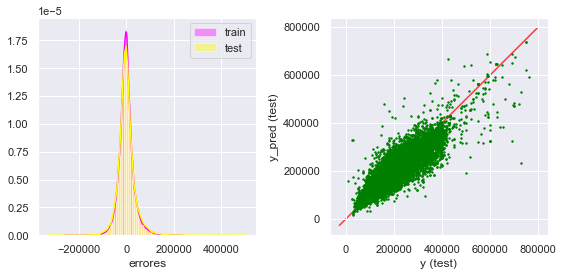

In [167]:
rmse_train_xgb_3 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_xgb_3 = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train_xgb_3 = mean_absolute_error(y_train, y_train_pred)
mae_test_xgb_3 = mean_absolute_error(y_test, y_test_pred)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_xgb_3}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_xgb_3}')
print(f'El error absoluto medio en Train: {mae_train_xgb_3}')
print(f'El error absoluto medio en Test: {mae_test_xgb_3 }')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

### Con data sin filtrar por tipo de propiedad


####  Regresion polinomica  por sus argumentos por defecto y Validacion cruzada

In [168]:
pr_2_rlp=pr_1_c_e.copy()

In [169]:
X=pr_2_rlp.drop(columns = ['price'])
y=pr_2_rlp.price

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [171]:
reg = LinearRegression()
columns=["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]
transformer= make_column_transformer((PolynomialFeatures(include_bias=False), columns),remainder= 'passthrough')
#poly = PolynomialFeatures(include_bias=False)
X_train_poly = transformer.fit_transform(X_train)
X_test_poly = transformer.transform(X_test)
print(X_train_poly.shape,X_test_poly.shape )

(50908, 80) (21818, 80)


In [172]:
#Instancio y entreno modelo
reg_3  = LinearRegression()
reg_3.fit(X_train_poly, y_train)

LinearRegression()

In [173]:
#Cross Validation ##Ver cv a elegir
reg_score_train = abs(cross_val_score(reg_3  , X_train_poly , y_train, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE train:%0.2f (+/- %0.2f)'% (reg_score_train.mean(),reg_score_train.std()))
reg_score_test = abs(cross_val_score(reg_3  , X_test_poly , y_test, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE test:%0.2f (+/- %0.2f)'% (reg_score_test.mean(),reg_score_test.std()))

RMSE train:40101.14 (+/- 317.29)
RMSE test:39897.83 (+/- 330.80)


In [174]:
y_train_pred=reg_3.predict(X_train_poly)
y_test_pred=reg_3.predict(X_test_poly)

Raíz del error cuadrático medio en Train: 40030.79856813295
Raíz del error cuadrático medio en Test: 39790.32175901677
El error absoluto medio en Train: 29697.68433345939
El error absoluto medio en Test: 29559.128767841383


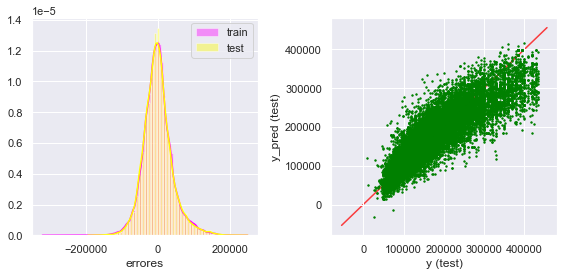

In [175]:
rmse_train_2_rlp = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_2_rlp = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train_2_rlp = mean_absolute_error(y_train, y_train_pred)
mae_test_2_rlp = mean_absolute_error(y_test, y_test_pred)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_2_rlp}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_2_rlp}')
print(f'El error absoluto medio en Train: {mae_train_2_rlp}')
print(f'El error absoluto medio en Test: {mae_test_2_rlp }')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [176]:
reg_rd_1 = Ridge () # aplicar con colums_transformer
reg_rd_1.fit(X_train_poly,y_train)

print(f'Pendientes: {reg_rd_1.coef_}')
print(f'Ordenada: {reg_rd_1.intercept_}')

Pendientes: [-1.91825392e+02  1.91648321e+03  1.90582377e+04  1.86300691e+03
  1.31965094e+03 -2.06498949e+03  1.80484698e+03  3.71447799e+01
  2.77260843e+02 -1.84796464e+02 -9.69722351e+02 -4.23420759e+03
 -1.40225686e+01  2.20832943e+00 -4.27117181e+02  2.30248998e+02
 -8.10579980e+01 -1.22280345e+01  4.71133442e+00 -2.11955517e+00
  5.31451279e+03  5.62536453e+03  4.91990062e+03 -1.91653018e+04
  6.96020466e+03  4.61788162e+04  5.26340339e+04 -3.43238914e+04
 -8.80480403e+03  1.53834918e+04 -7.33057085e+03 -9.06029708e+03
  9.11820509e+03  3.12035611e+04  2.90997051e+04 -1.60329659e+04
 -3.52470394e+04 -1.40025119e+04 -2.63047305e+04  6.43133328e+04
 -7.93292637e+03 -2.67449215e+04 -1.80205643e+04 -1.09018810e+04
  5.07883148e+04 -2.22205815e+04  5.33365685e+04 -3.60695127e+04
  6.80612333e+03 -1.64798970e+04  2.30482978e+03 -1.91809785e+04
 -4.53360531e+03 -5.36566904e+04  1.60228631e+05  5.68080603e+04
  2.94653282e+04  1.75340737e+04 -2.20826110e+04 -8.96889047e+03
  6.75762593e

Raíz del error cuadrático medio en Train: 40030.96068689813
Raíz del error cuadrático medio en Test: 39789.48878085504
El error absoluto medio  en Train: 29695.973317698124
El error absoluto medio  en Test: 29556.635554057466


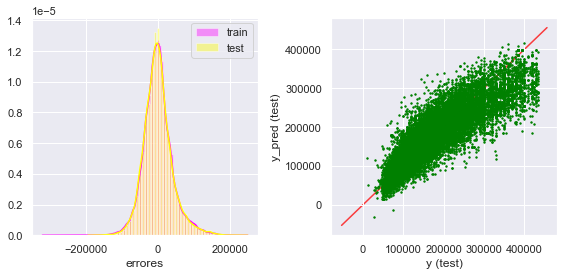

In [177]:
y_train_pred_rd=reg_rd_1.predict(X_train_poly)
y_test_pred_rd=reg_rd_1.predict(X_test_poly)
rmse_train_2_rd = np.sqrt(mean_squared_error(y_train, y_train_pred_rd))
rmse_test_2_rd = np.sqrt(mean_squared_error(y_test, y_test_pred_rd))
mae_train_2_rd=mean_absolute_error(y_train,y_train_pred_rd)
mae_test_2_rd=mean_absolute_error(y_test, y_test_pred_rd)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_2_rd}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_2_rd}')
print(f'El error absoluto medio  en Train:',mae_train_2_rd)
print(f'El error absoluto medio  en Test:', mae_test_2_rd)
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_rd, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred_rd, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_rd, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

##### Optimizando los hiperparametros

In [178]:
p_2_rlp=pr_1_c_e.copy()

In [179]:
X=p_2_rlp.drop(columns = ['price'])
y=p_2_rlp.price

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [181]:
# Seleccionamos las columnas
numerical_columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
categorical_columns = ['l3', 'property_type' ]
# Instanciamos el preprocesador
preprocessor = make_column_transformer((PolynomialFeatures(), numerical_columns),remainder= 'passthrough')
# Regresor 
regressor = LinearRegression()
# Pipeline
pipeline_poly = make_pipeline(preprocessor, regressor)
# GridSearch
params = {'columntransformer__polynomialfeatures__degree': [1, 2, 3, 4, 5]}
gs3 = GridSearchCV(estimator=pipeline_poly,
                  param_grid=params,
                  scoring='neg_root_mean_squared_error',
                  cv=5)

In [182]:
gs3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('polynomialfeatures',
                                                                         PolynomialFeatures(),
                                                                         ['rooms',
                                                                          'bedrooms',
                                                                          'bathrooms',
                                                                          'surface_total',
                                                                          'surface_covered'])])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'columntransformer__polynomialfeatures__degree': [1, 2

In [183]:
gs3.best_params_

{'columntransformer__polynomialfeatures__degree': 3}

In [184]:
print('mejores parametros:'+str (gs3.best_params_))
print('Mejor Score:'+ str (abs(gs3.best_score_)))

mejores parametros:{'columntransformer__polynomialfeatures__degree': 3}
Mejor Score:39894.149701006965


In [185]:
pd.DataFrame(gs3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.486202,0.003186,0.021199,0.000400,1,{'columntransformer__polynomialfeatures__degre...,-40661.094066,-40522.384772,-40792.971033,-4.155947e+04,-40849.896917,-40877.162888,359.423077,4
1,0.666802,0.053569,0.032002,0.000630,2,{'columntransformer__polynomialfeatures__degre...,-39966.655098,-39688.224084,-40130.760505,-4.065992e+04,-40060.142059,-40101.140010,317.293914,3
2,1.014799,0.065184,0.045000,0.002757,3,{'columntransformer__polynomialfeatures__degre...,-39742.592290,-39548.972752,-39887.010665,-4.042401e+04,-39868.161529,-39894.149701,291.065768,1
3,1.737001,0.037959,0.078202,0.002784,4,{'columntransformer__polynomialfeatures__degre...,-39586.947709,-39540.562520,-40067.388410,-4.084170e+04,-39850.994369,-39977.517684,472.093797,2
4,3.377400,0.160002,0.130799,0.008470,5,{'columntransformer__polynomialfeatures__degre...,-39765.022306,-230655.961072,-41159.844341,-1.993358e+06,-41643.614665,-469316.419723,765558.226310,5


##### Aplicando el mejor hiperparametro. degree=3

In [186]:
pr_rlp_2=pr_1_c_e.copy()

In [187]:
X=pr_rlp_2.drop(columns = ['price'])
y=pr_rlp_2.price

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [189]:
# genero los caracteres del polinomio

categorical_columns = ['l3', 'property_type']
numerical_columns = ['rooms', 'bedrooms', 'bathrooms', 
                     'surface_total', 'surface_covered']
preprocessor = make_column_transformer((PolynomialFeatures(include_bias=False, degree=3), numerical_columns),remainder= 'passthrough')
#nuevo test y train
X_train_poly = preprocessor.fit_transform (X_train)
X_test_poly = preprocessor.transform (X_test)
print(X_train_poly.shape,X_test_poly.shape )

(50908, 115) (21818, 115)


In [190]:
reg_4  = LinearRegression()
reg_4.fit(X_train_poly, y_train)

LinearRegression()

In [191]:
#Cross Validation 
reg_score_train = abs(cross_val_score(reg_4 , X_train_poly , y_train, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE train:%0.2f (+/- %0.2f)'% (reg_score_train.mean(),reg_score_train.std()))
reg_score_test = abs(cross_val_score(reg_4 , X_test_poly, y_test, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE test:%0.2f (+/- %0.2f)'% (reg_score_test.mean(),reg_score_test.std()))

RMSE train:39894.15 (+/- 291.07)
RMSE test:39691.12 (+/- 359.10)


In [192]:
y_train_pred=reg_4.predict(X_train_poly)
y_test_pred=reg_4.predict(X_test_poly)

Raíz del error cuadrático medio en Train: 39765.2072719393
Raíz del error cuadrático medio en Test: 39529.21242707846
El error absoluto medio en Train: 29462.464473570784
El error absoluto medio en Test: 29348.9526044071


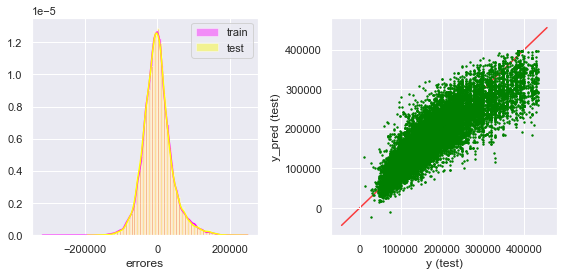

In [193]:
rmse_train_rlp_2 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_rlp_2 = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train_rlp_2 = mean_absolute_error(y_train, y_train_pred)
mae_test_rlp_2 = mean_absolute_error(y_test, y_test_pred)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_rlp_2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_rlp_2}')
print(f'El error absoluto medio en Train: {mae_train_rlp_2}')
print(f'El error absoluto medio en Test: {mae_test_rlp_2 }')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

##### Buscando el mejor hiperparametro alpha para regularizar con Ridge

In [194]:
ridge= Ridge()
params={'alpha': np.logspace(-1,2,20)}
reg_rd.fit(X_train_poly,y_train)
reg_rd_3 = GridSearchCV(ridge,
                  param_grid=params,
                  scoring='neg_root_mean_squared_error',
                  cv=5)

In [195]:
reg_rd_3.fit (X_train_poly,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ])},
             scoring='neg_root_mean_squared_error')

In [196]:
reg_rd_3.best_params_

{'alpha': 0.1}

In [197]:
print('mejores parametros:'+str (reg_rd_3.best_params_))
print('Mejor Score:'+ str (abs(reg_rd_3.best_score_)))

mejores parametros:{'alpha': 0.1}
Mejor Score:39894.381681320345


In [198]:
pd.DataFrame(reg_rd_3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.323599,0.014665,0.007203,0.000399,0.1,{'alpha': 0.1},-39742.811485,-39548.744328,-39887.446374,-40424.295097,-39868.611121,-39894.381681,291.190368,1
1,0.342601,0.012372,0.007400,0.001356,0.143845,{'alpha': 0.14384498882876628},-39742.916616,-39548.662757,-39887.617844,-40424.423402,-39868.812047,-39894.486533,291.241126,2
2,0.388799,0.036801,0.007399,0.000802,0.206914,{'alpha': 0.20691380811147897},-39743.075944,-39548.560909,-39887.845659,-40424.609353,-39869.103939,-39894.639161,291.310202,3
3,0.382399,0.026129,0.006804,0.000749,0.297635,{'alpha': 0.29763514416313175},-39743.319405,-39548.439801,-39888.138072,-40424.875809,-39869.527946,-39894.860207,291.401840,4
4,0.406202,0.036232,0.007399,0.000802,0.428133,{'alpha': 0.42813323987193935},-39743.693171,-39548.303142,-39888.495365,-40425.248857,-39870.142378,-39895.176583,291.518910,5
5,0.368000,0.019617,0.006800,0.000401,0.615848,{'alpha': 0.6158482110660264},-39744.266368,-39548.153957,-39888.902469,-40425.750338,-39871.027633,-39895.620153,291.660302,6
6,0.371999,0.022654,0.007600,0.001354,0.885867,{'alpha': 0.8858667904100825},-39745.138407,-39547.984945,-39889.323179,-40426.382875,-39872.291297,-39896.224140,291.817109,7
7,0.381000,0.037101,0.008602,0.002332,1.27427,{'alpha': 1.2742749857031335},-39746.446899,-39547.763791,-39889.705631,-40427.111193,-39874.075412,-39897.020585,291.968760,8
8,0.356802,0.017268,0.008001,0.001675,1.83298,{'alpha': 1.8329807108324356},-39748.379852,-39547.424866,-39890.015048,-40427.856093,-39876.573537,-39898.049879,292.081986,9
9,0.342199,0.011752,0.007001,0.001094,2.63665,{'alpha': 2.636650898730358},-39751.203009,-39546.889701,-39890.309175,-40428.528500,-39880.072217,-39899.400520,292.116085,10


In [199]:
reg_3_rd = Ridge (alpha=0.1)
reg_3_rd.fit(X_train_poly,y_train)

print(f'Pendientes: {reg_3_rd.coef_}')
print(f'Ordenada: {reg_3_rd.intercept_}')

Pendientes: [-7.06918815e+04  3.93100111e+04 -1.37843171e+04  2.39625734e+03
  6.50656902e+02  2.19214068e+04 -2.20282409e+04  6.92949379e+04
  5.07381878e+02 -7.67474090e+02  1.28443572e+04 -1.39184014e+04
  1.06925704e+03 -2.14736251e+03 -2.41978049e+04 -1.70006006e+03
  1.73029603e+03 -5.13998310e+01  1.01106431e+02 -3.76195591e+01
 -3.76337197e+03  7.29696427e+03 -7.26082573e+03 -1.71259463e+02
  2.06665003e+02 -5.36943920e+02 -4.87355423e+03 -1.74524397e+02
  1.33267471e+02 -4.76996527e+03  6.09032479e+02 -6.96333808e+02
  1.02107842e+01 -2.79409266e+01  2.04321058e+01 -3.11227650e+03
  1.03399519e+03  1.02440771e+02 -6.10888348e+01  2.49136145e+02
 -3.24027165e+02  6.46559942e+02 -1.41348677e+01  3.42843486e+01
 -1.75358391e+01  6.44066961e+03  2.25404806e+02 -2.38023639e+02
  3.52583800e+00 -1.14401201e+01  6.46744159e+00  2.14975668e-01
 -5.54306399e-01  4.62084505e-01 -2.50254199e-01  5.80986385e+03
  6.38672127e+03  4.53440928e+03 -1.92215804e+04  6.31229874e+03
  4.60011610e

Raíz del error cuadrático medio en Train: 39765.22095680712
Raíz del error cuadrático medio en Test: 39528.791394194894
El error absoluto medio  en Train: 29462.264421915104
El error absoluto medio  en Test: 29348.430839742734


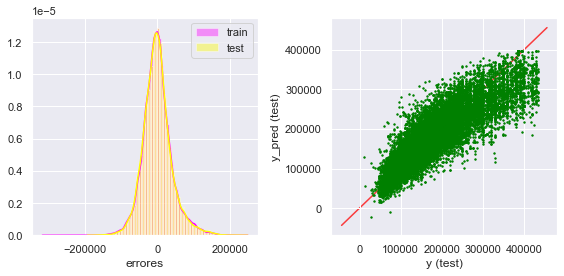

In [200]:
y_train_pred_rd=reg_3_rd.predict(X_train_poly)
y_test_pred_rd=reg_3_rd.predict(X_test_poly)
rmse_train_rd_2 = np.sqrt(mean_squared_error(y_train, y_train_pred_rd))
rmse_test_rd_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_rd))
mae_train_rd_2=mean_absolute_error(y_train,y_train_pred_rd)
mae_test_rd_2=mean_absolute_error(y_test, y_test_pred_rd)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_rd_2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_rd_2}')
print(f'El error absoluto medio  en Train:',mae_train_rd_2)
print(f'El error absoluto medio  en Test:', mae_test_rd_2)
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_rd, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred_rd, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_rd, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

#### XGBoost

In [201]:
pr_2_xgb=pr_1_c_e.copy()


In [202]:
X=pr_2_xgb.drop(columns = ['price'])
y=pr_2_xgb.price

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [204]:
xgb_reg_1=XGBRegressor(objective = 'reg:squarederror')

In [205]:
xgb_reg_1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [206]:
#Cross Validation ##Ver cv a elegir
xgb_score_train = abs(cross_val_score(xgb_reg_1 , X_train, y_train, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE train:%0.2f (+/- %0.2f)'% (xgb_score_train .mean(),xgb_score_train .std()))
xgb_score_test = abs(cross_val_score(xgb_reg_1 , X_test , y_test, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE test:%0.2f (+/- %0.2f)'% (xgb_score_test.mean(),xgb_score_test.std()))

RMSE train:35027.81 (+/- 383.12)
RMSE test:36040.02 (+/- 372.25)


In [207]:
y_train_pred=xgb_reg_1.predict(X_train)
y_test_pred=xgb_reg_1.predict(X_test)

Raíz del error cuadrático medio en Train: 32391.91191456344
Raíz del error cuadrático medio en Test: 34569.39592652789
El error absoluto medio en Train: 23164.63308988457
El error absoluto medio en Test: 24594.87678957383


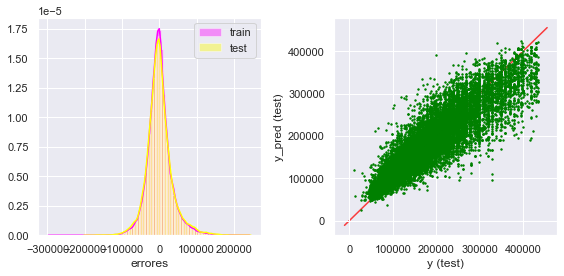

In [208]:
rmse_train_2_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_2_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train_2_xgb = mean_absolute_error(y_train, y_train_pred)
mae_test_2_xgb = mean_absolute_error(y_test, y_test_pred)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_2_xgb}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_2_xgb}')
print(f'El error absoluto medio en Train: {mae_train_2_xgb}')
print(f'El error absoluto medio en Test: {mae_test_2_xgb }')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

##### Optimizando hiperparametros

In [209]:
pr_2_h=pr_1_c_e.copy()

In [210]:
X=pr_2_h.drop(columns = ['price'])
y=pr_2_h.price

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [212]:
 from sklearn.model_selection import RandomizedSearchCV

In [213]:
param_grid = {'nthread': [4],
              'objective': ['reg:squarederror'],
              'learning_rate': [0.1,0.2,0.3],
              'max_depth':[4,5,6],
              'min_child_weight': [1,2,3,4],
              'subsample':[0.5,0.7,1],
              'colsample_bytree':[0.5,0.7,1],
              'reg_lambda':[1,2,3],
              'n_estimators':[100,200,300]} 
xgb_reg=XGBRegressor()
rs2 =RandomizedSearchCV(xgb_reg, param_grid, scoring='neg_root_mean_squared_error', cv=5,random_state=42)

In [214]:
rs2.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [215]:
rs2.best_params_

{'subsample': 1,
 'reg_lambda': 2,
 'objective': 'reg:squarederror',
 'nthread': 4,
 'n_estimators': 300,
 'min_child_weight': 4,
 'max_depth': 5,
 'learning_rate': 0.3,
 'colsample_bytree': 0.5}

##### Aplicando los mejores hiperparametros

In [216]:
pr_xgb_2=pr_1_c_e.copy()

In [217]:
X=pr_xgb_2.drop(columns = ['price'])
y=pr_xgb_2.price

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [219]:
xgb_h_reg=XGBRegressor(colsample_bytree= 0.5,
                       learning_rate= 0.3,
                       max_depth= 5,
                       min_child_weight=4,
                       n_estimators= 300,
                       nthread= 4,
                       objective= 'reg:squarederror',
                       reg_lambda= 2,
                       subsample= 1)

In [220]:
xgb_h_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [221]:
#Cross Validation ##Ver cv a elegir
xgb_score_train = abs(cross_val_score(xgb_h_reg , X_train, y_train, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE train:%0.2f (+/- %0.2f)'% (xgb_score_train .mean(),xgb_score_train .std()))
xgb_score_test = abs(cross_val_score(xgb_h_reg , X_test , y_test, cv=5,
                               scoring='neg_root_mean_squared_error'))
print('RMSE test:%0.2f (+/- %0.2f)'% (xgb_score_test.mean(),xgb_score_test.std()))

RMSE train:34510.13 (+/- 515.98)
RMSE test:35668.74 (+/- 461.93)


In [222]:
y_train_pred=xgb_h_reg.predict(X_train)
y_test_pred=xgb_h_reg.predict(X_test)

Raíz del error cuadrático medio en Train: 31660.118267294896
Raíz del error cuadrático medio en Test: 33802.17009279276
El error absoluto medio en Train: 22445.540842595343
El error absoluto medio en Test: 23837.800511797886


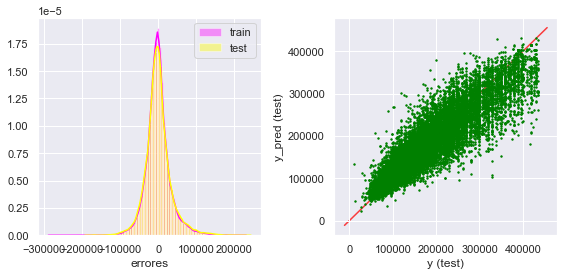

In [223]:
rmse_train_xgb_2 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_xgb_2 = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train_xgb_2 = mean_absolute_error(y_train, y_train_pred)
mae_test_xgb_2 = mean_absolute_error(y_test, y_test_pred)
print(f'Raíz del error cuadrático medio en Train: {rmse_train_xgb_2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_xgb_2}')
print(f'El error absoluto medio en Train: {mae_train_xgb_2}')
print(f'El error absoluto medio en Test: {mae_test_xgb_2 }')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins =100, label = 'train',color='magenta')
sns.distplot(y_test - y_test_pred, bins = 100, label = 'test',color='yellow')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2, color ='green')

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, color='red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

#### Comparacion de resultados Obtenidos

In [224]:
result_d= {'Modelo':['knn_2','knn_2','knn_3','knn_3','2_rd','2_rd','3_rd','3_rd','rd_2','rd_2','rd_3','rd_3',
                     '2_xgb','2_xgb','3_xgb','3_xgb','xgb_2','xgb_2','xgb_3','xgb_3'],
           'Error':[knn_rmse_train_2,knn_rmse_test_2,knn_rmse_train_3,knn_rmse_test_3,rmse_train_2_rd,rmse_test_2_rd,
                   rmse_train_3_rd,rmse_test_3_rd,rmse_train_rd_2,rmse_test_rd_2,rmse_train_rd_3,rmse_test_rd_3,
                   rmse_train_2_xgb,rmse_test_2_xgb,rmse_train_3_xgb,rmse_test_3_xgb,rmse_train_xgb_2,rmse_test_xgb_2,
                   rmse_train_xgb_3,rmse_test_xgb_3],
          'Resultado':['train','test','train','test','train','test','train','test','train','test','train','test',
                       'train','test','train','test','train','test','train','test']}
tabla=pd.DataFrame(result_d)
tabla

,Modelo,Error,Resultado
0,knn_2,36869.466133,train
1,knn_2,40385.457388,test
2,knn_3,38595.911625,train
3,knn_3,43315.295426,test
4,2_rd,40030.960687,train
5,2_rd,39789.488781,test
6,3_rd,41774.699410,train
7,3_rd,42590.252985,test
8,rd_2,39765.220957,train
9,rd_2,39528.791394,test


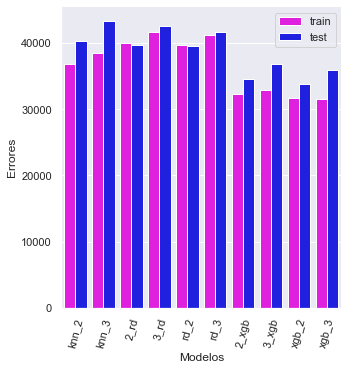

In [225]:
my_pal={'train':'magenta','test':'blue'}
sns.catplot(x='Modelo', y='Error' ,palette=my_pal, hue='Resultado',kind='bar', data=tabla, legend=False)
plt.xlabel('Modelos')
plt.xticks (rotation =75)
plt.ylabel('Errores')
plt.ylim(ymin=0)
plt.legend(loc='best')

### Segun los resultados obtenidos, podemos concluir
##### Los modelos en general tienden a subvalorar el precio  de las propiedades a medidas que el precio es mayor:
###### 1)tal vez se debe a que los valores outliers que eliminamos en realidad son valores atipicos naturales, y no valores atipicos artificiales (debido a un error); y por lo tanto no cuenta con el dato para poder predecir los precios de esas propiedades.  Tal vez deberiamos considerar tratarlos de forma diferente,  ya sea dejandolos en el dataset o  por separados creando modelos especiales.
###### 2)O tal vez se deba a datos sobre las propiedades en si que desconocemos o no esta en el dataset, y que podrian ser importantes a la hora de evaluar el Precio de cada propiedad (por ej si son propiedades con algun valor historico, o si los parquizados son relevantes, o el teimpo de vida de la construccion, etc)
##### Lo que si llama la atencion que los modelos que poseen mayor diferencia en la prediccion de los precios son aquellos en los que la transformacion de datos se hicieron por tipo de Propiedad. Como ya indique anteriormente, es un dataset en el que el predominio de  propiedades son los departamentos, y cuya distribucion en los barrios tambien es totalmente diferente, al de casas por ejemplo. Tal vez habria que tratar cada propiedad por separado. 
##### A la vista de los resultados obtenidos el modelo elegido  XGBoost con el dataset  sin filtrar por el tipo de propiedad y con la optimizacion de los hiperparametros  (xgb_2)


## Parte C - Interpretacion de Modelos

#### Variables relevantes que utiliza el modelo elegido (xgb_2)  para predecir 


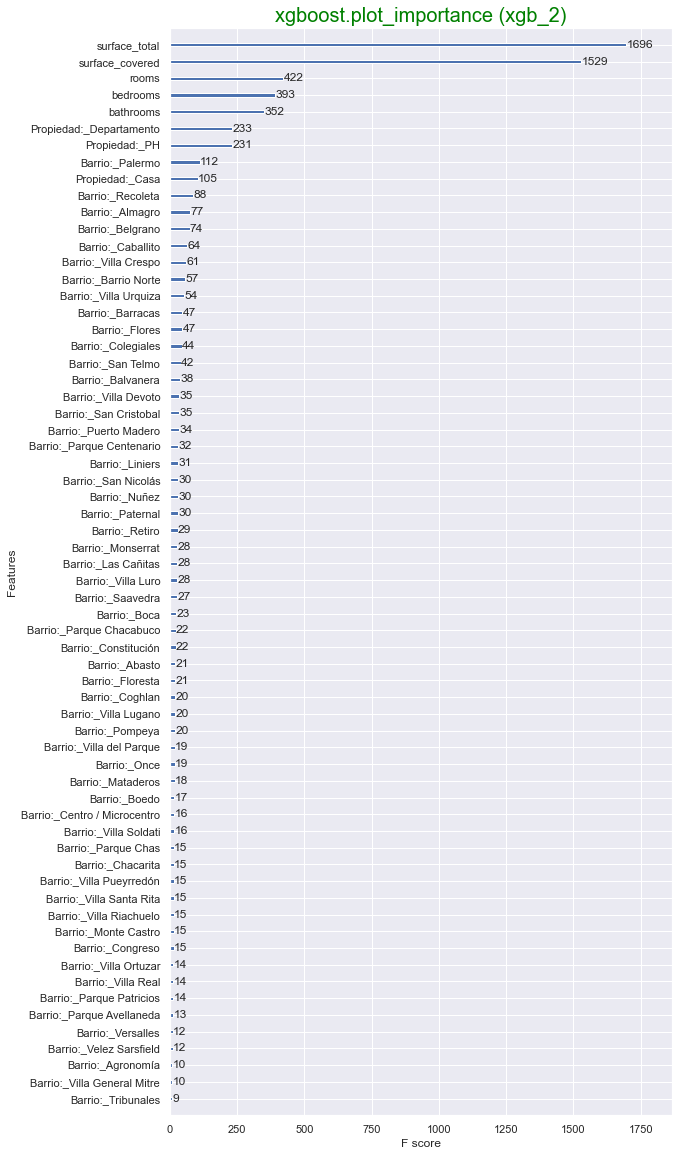

In [227]:
#plot_importance () Proporciona un gráfico de barras simple que representa la importancia de cada característica en nuestro conjunto de datos
xgb.plot_importance(xgb_h_reg)
plt.rcParams['figure.figsize'] = [9,20]
plt . title ( "xgboost.plot_importance (xgb_2)",color='green',size=20 ) 
plt.show()


#### Si observamos la importancia de las características que devuelve XGBoost, vemos que superficie total y superficie cubierta dominan las otras características, destacándose claramente como los predictores más importante del precio de las propiedades. Y coincide con lo que esperaba en cuanto a  las mas relevantes.
#### Claramente  hay barrios que son muchos menos relevantes que otros.
#### De todas formas me parece que hay una informacion que no estamos obteniendo, que hace los errores de prediccion se agudicen a medida que el precio de las propiedades aumenta. 
#### Con los resultados a la vista lo que mejoraria  o buscaria un modelo que pueda predecir en forma precisa los valores de las propiedades mas caras
#### En cuanto al error obtenido: la distribucion es normal (uniforme). Y no se observa que el modelo este ¨overfitteando¨, ya que los errores obtenidos en el test y en el train son similares
